#Implémentation d'un modèle de scoring


Inspiré par le Kernel :

https://www.kaggle.com/code/ajay1735/my-credit-scoring-model


## Sommaire

 [1.Introduction](#Int)  

 [2.Chargement du DataFrame](#Cha)

 [3.Modèle du DataFrame](#Mod)

 [4.Données manquantes](#Man)

 [5.Inégalités dans le DataFrame](#Ine)

 [6.Application Data](#App)

 [7.Bureau Data](#Bur)

 [8.Previous application Data](#Pre)

 [9.Corrélations](#Cor)



<a name="Int"></a>
# **Introduction**


<a href="http://www.homecredit.net/">Home Credit</a> est un institut financier fondée en 1997 en République Tchèque.

L'institut exerce ses activités dans 14 pays et accorde des prets bancaires à des individus avec divers historiques en ce qui concerne leurs crédits.

Home Credit group a 29 millions de clients , 21 Milliard d'Euros de chiffre d'affaires obtenus à travers 160 millions de prets, avec la majorité ayant été effectués en Asie.

La compagnie utilise une quantité important de Data pour prédire les capacités de remboursement de leurs clients, et ces données sont disponibles de Kaggle dans le but de maximiser le potentiel de leur exploitation.

<a name="Cha"></a>
# **Chargement du DataFrame**


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH='/data/'

Mounted at /content/drive


In [ ]:
application_train = pd.read_csv(PATH+"application_train.csv")
application_test = pd.read_csv(PATH+"application_test.csv")
bureau = pd.read_csv(PATH+"bureau.csv")
bureau_balance = pd.read_csv(PATH+"bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"installments_payments.csv")
previous_application = pd.read_csv(PATH+"previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"POS_CASH_balance.csv")

<a name="Mod"></a>
# **3. Modèle du DataFrame**


## <a id="31">Structure de la Data</a>

Voici une image résumant la structure de la data

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" width="800"></img>

Les dataframes *application_train* and *application_test* contiennent les informations sur les emprunts et leur candidats. Le dataframe *bureau* contient les emprunts des applicants auprès d'autres sociétés de crédits. Le dataframe *previous_applications* contient les précédents emprunts auprès de **Home Credit** par un meme client, avec des informations sur l'issue de l'emprunt en question.

**SK_ID_CURR** connecte les dataframes *application_train*|*test* avec *bureau*, *previous_application* et aussi avec dataframes *POS_CASH_balance*, *installments_payment* and *credit_card_balance*. **SK_ID_PREV** connecte le dataframe *previous_application* avec *POS_CASH_balance*, *installments_payment* et *credit_card_balance*. **SK_ID_BUREAU** connecte le dataframe *bureau* avec le dataframe *bureau_balance*.

In [ ]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


### application_train

In [ ]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### application_test

In [ ]:
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

### bureau

In [ ]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

### bureau_balance

In [ ]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

### credit_card_balance

In [ ]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

### installments_payments

In [ ]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

### previous_applications

In [ ]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

### POS_CASH_balance

In [ ]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

<a name="Man"></a>
# **Données Manquantes**


In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

## application_train

Dans application_train(pareil pour application_test), les données les plus manquantes sont liées aux features liées à la localisation et au type d'habitations dans lesquelles résident les clients

In [ ]:
missing_data(application_train).head(10)


Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953

### application_test

In [ ]:
missing_data(application_test).head(10)

Total    Percent
COMMONAREA_AVG            33495  68.716150
COMMONAREA_MODE           33495  68.716150
COMMONAREA_MEDI           33495  68.716150
NONLIVINGAPARTMENTS_AVG   33347  68.412523
NONLIVINGAPARTMENTS_MODE  33347  68.412523
NONLIVINGAPARTMENTS_MEDI  33347  68.412523
FONDKAPREMONT_MODE        32797  67.284179
LIVINGAPARTMENTS_AVG      32780  67.249302
LIVINGAPARTMENTS_MODE     32780  67.249302
LIVINGAPARTMENTS_MEDI     32780  67.249302

### bureau

Les données les plus manquantes sont liées a l'annuité de l'emprunt et le montant maximal de découvert autorisé sur le crédit.

In [ ]:
missing_data(bureau)

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_ACTIVE                 0   0.000000
CREDIT_CURRENCY               0   0.000000
DAYS_CREDIT                   0   0.000000
CREDIT_DAY_OVERDUE            0   0.000000
SK_ID_BUREAU                  0   0.000000
CNT_CREDIT_PROLONG            0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
CREDIT_TYPE                   0   0.000000
DAYS_CREDIT_UPDATE            0   0.000000
SK_ID_CURR                    0   0.000000

### bureau_balance

In [ ]:
missing_data(bureau_balance)

Total  Percent
SK_ID_BUREAU        0      0.0
MONTHS_BALANCE      0      0.0
STATUS              0      0.0

In [ ]:
bureau_balance_num_columns = ['MONTHS_BALANCE']
bureau_balance_cat_columns = ['STATUS']

### credit_card_balance

Les données manquantes ici sont peu élevées ( inférieures à 20%) et concernent les paiements des clients en cours et leurs retrait auprès de distributeurs.

In [ ]:
missing_data(credit_card_balance)

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_ID_PREV                       0   0.000000
AMT_TOTAL_RECEIVABLE             0   0.000000
SK_DPD                           0   0.000000
NAME_CONTRACT_STATUS             0   0.000000
CNT_DRAWINGS_CURRENT             0   0.000000
AMT_PAYMENT_TOTAL_CURRENT        0   0.000000
AMT_RECIVABLE                    0   0.000000
AMT_RECEIVABLE_PRINCIPAL         0   0.000000
SK_ID_CURR                       0   0.000000
AMT_DRAWINGS_CURRENT             0   0.000000
AMT_CREDIT_LIMIT_ACTUAL          0   0.000000
AMT_BALANCE                      0   0.000000
MONTHS_BALANCE                   0   0.000000
SK_DPD_DEF                       0   0.000000

### installments_payments

Ici, très peu de données manquantes, aucun commentaire à faire sur les features.

In [ ]:
missing_data(installments_payments)

Total   Percent
DAYS_ENTRY_PAYMENT       2905  0.021352
AMT_PAYMENT              2905  0.021352
SK_ID_PREV                  0  0.000000
SK_ID_CURR                  0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
DAYS_INSTALMENT             0  0.000000
AMT_INSTALMENT              0  0.000000

### previous_applications

Ici les données manquantes sont liées aux taux d'intérets principalement.

In [ ]:
missing_data(previous_application).head(20)

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_TERMINATION            673065  40.298129
DAYS_LAST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716
AMT_CREDIT                       1   0.000060
NAME_YIELD_GROUP                 0   0.000000
NAME_PORTFOLIO                   0   0.000000
NAME_SELLER_INDUSTRY             0   0.000000
SELLERPLACE_AREA                 0   0.000000

### POS_CASH_balance

In [ ]:
missing_data(POS_CASH_balance)

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_ID_PREV                 0  0.000000
SK_ID_CURR                 0  0.000000
MONTHS_BALANCE             0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
SK_DPD                     0  0.000000
SK_DPD_DEF                 0  0.000000

<a name="Ine"></a>
# **Inégalités dans le DataFrame**


**TARGET**  0 veut dire que le pret n'a pas été remboursé, 1 signifie que le pret n'a pas été remboursé

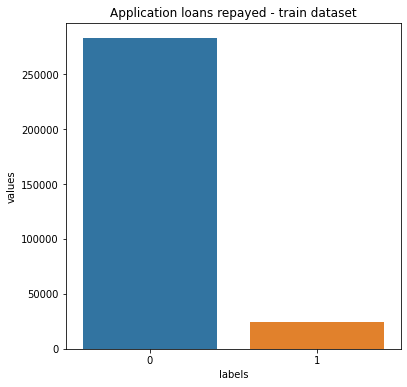

In [ ]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


<a name="App"></a>
# **Application Data**


    
Visualisons les différents types d'emprunts et aussi, dans un graph à part, le pourcentage des emprunts avec **TARGET** égal à 1 (non remboursés).

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [ ]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

Le type de contrat renouvelable *Revolving loans* représente une petite fraction (10%) du nombre total d'emprunts, mais une grosse partie d'entre eux ne sont pas remboursés.

### Client gender

Voyons maintenant les infos sur le genre des clients.

In [ ]:
plot_stats('CODE_GENDER')

### Flag own car et flag own real estate

Voyons les données sur les emprunts en fonction de la possession de la client d'une voiture ou d'un bien immobilier.


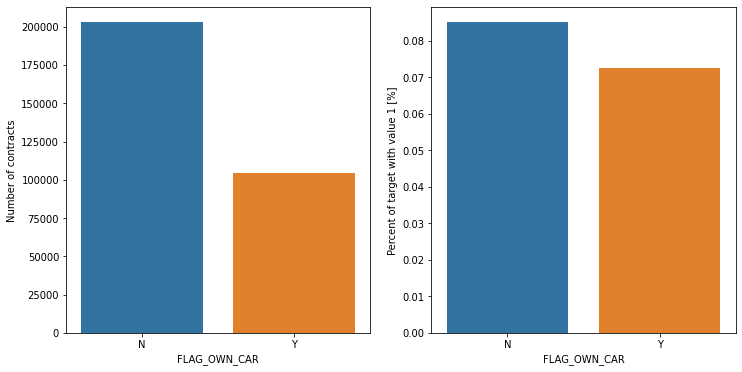

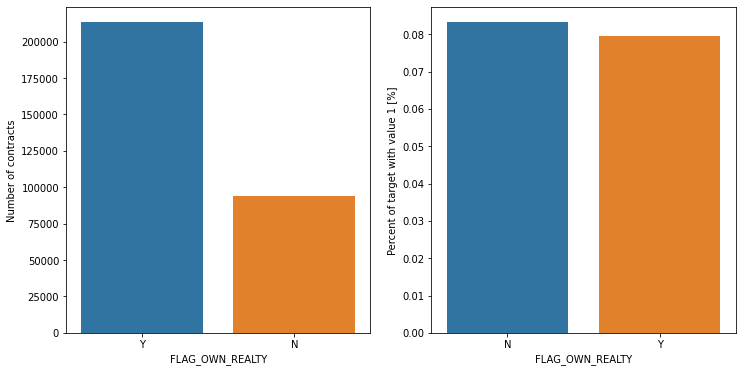

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Les clients qui ont une voiture sont moins nombreux que ceux qui en ont pas et ont une tendance a avoir moins de problèmes pour rembourser les emprunts.

Les clients ayant une propriété immobilière sont deux fois plus nombreux que ceux qui en ont pas mais dans tout les cas, les emprunts non remboursés sont faibles.


### Family status of client

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

La plupart des clients sont mariés, suivis des célibataires/non mariés et des mariages civils.

En termes de pourcentage de non-remboursement de prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10 %).

### Nombre d'enfants

Voyons la distribution du nombre d'enfants parmi les clients.

In [ ]:
plot_stats('CNT_CHILDREN')

La majorité des emprunts acceptés sont pour des clients n'ayant pas d'enfants, ce qui s'explique par le fait qu'ils ont moins de responsabilités. Parallèlement, les familles avec 9 ou 11 enfants ont forcément un taux de remboursement néant, ce qui est compréhensible.


### Nombre de membres de famille par client

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

Dans la continuité de notre analyse précédente, les familles avec seulement 2 membres ont le plus de contrats alors que les familles avec 11 membres par exemple ont le plus de mal à rembourser leurs emprunts, ce qui est logique étant donné les responsabilités qu'une famille implique financièrement.

### Type de revenus du client

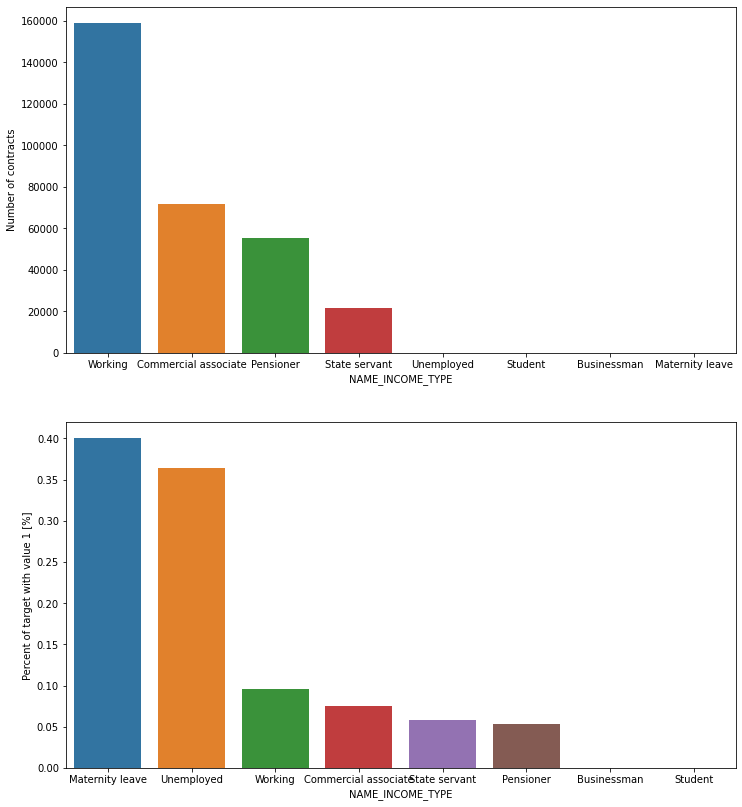

In [ ]:
plot_stats('NAME_INCOME_TYPE',False,False)

Les clients ayant des contrats sont majoritairement employés et ceux qui ont du mal à les rembourser sont des individus sans emploi ou des mères en congé maternité.

### Occupation/profession du client



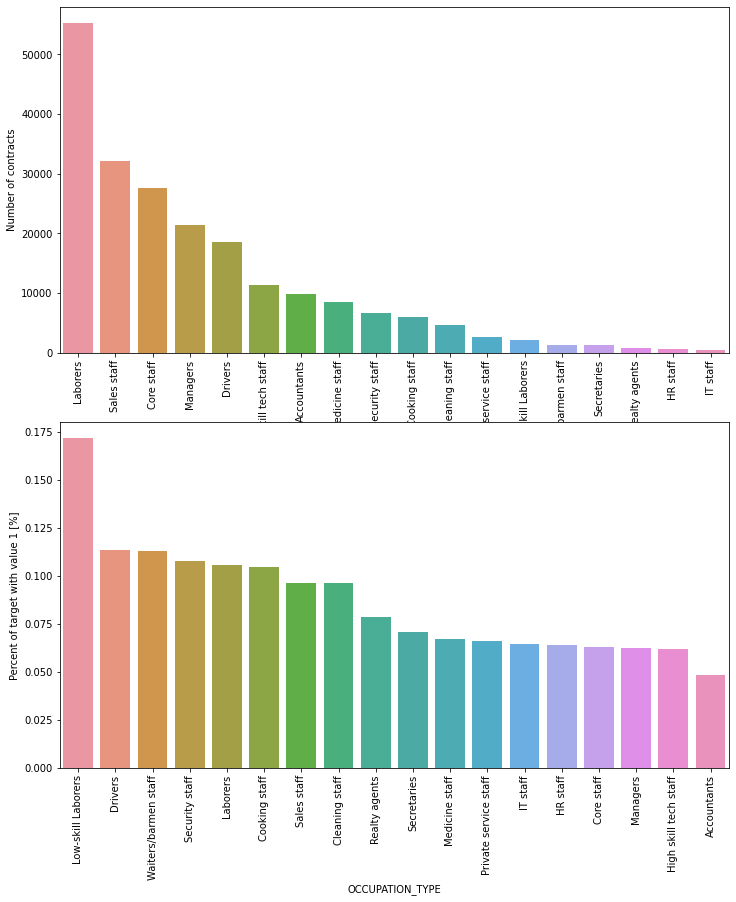

In [ ]:
plot_stats('OCCUPATION_TYPE',True, False)

Les individus avec le plus de contrats sont macons suivi des managers, dont des individus de classe moyenne. On observe que les ingénieurs dans notre étude ne sont pas les plus demandeurs. Enfin on voit que les manufacturiers, et les chauffeurs VTC sont ceux qui ont le plus de mal à rembourser leurs emprunts.

### Type d'organization 

In [ ]:
plot_stats('ORGANIZATION_TYPE',True, False)

Les organisations avec le plus de taux d'emprunts non remboursés sont *Transport: type 3* (16%), *Industry: type 13* (13.5%), *Industry: type 8* (12.5%) et *Restaurant* (less than 12%).

### Education type of the client

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

La majorité des clients sont des bacheliers et peu de clients sont des clients avec un diplome de haut niveau(BAC+5 etc)


### Type of the housing of client

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

Plus de 250 000 demandeurs de crédits ont inscrit leur logement en Maison/Appartement. Les catégories suivantes ont un très petit nombre de clients.

Parmi ces catégories, *Appartement loué* et *Avec parents* ont un taux de non-remboursement supérieur à 10 %.

### Total income distribution

Let's plot the distribution of total income for the clients.

In [ ]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
plot_distribution('AMT_INCOME_TOTAL','green')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Distribution des emprunts

Regardons la distribution des emprunts

In [ ]:
plot_distribution('AMT_CREDIT','blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Annuity distribution

Let's plot the annuity distribution.

In [ ]:
plot_distribution('AMT_ANNUITY','tomato')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Montant des produits

Regardons la distribution du montant des produits.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


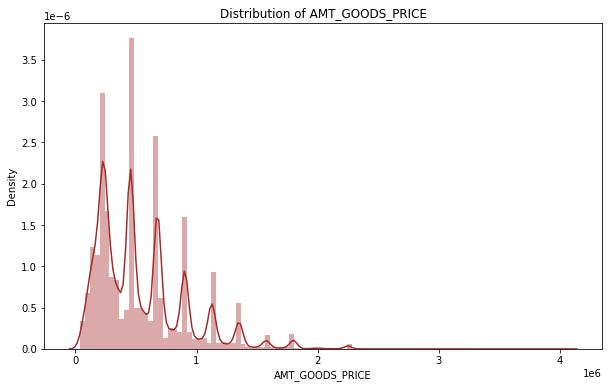

In [ ]:
plot_distribution('AMT_GOODS_PRICE','brown')

### Date d'anniversaire en jours



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


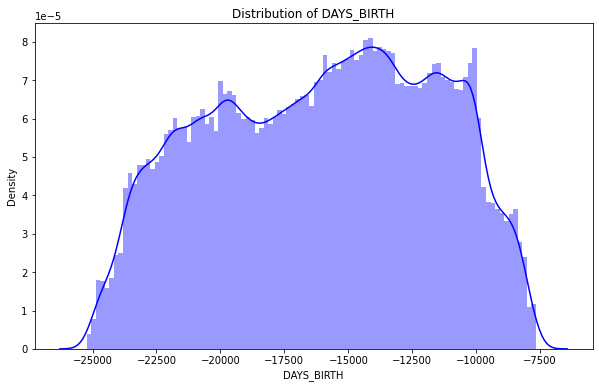

In [ ]:
plot_distribution('DAYS_BIRTH','blue')
#todo : afficher en années, regarder au début avec dummy classifier,feature importance à regarder 

Valeur négative : le nombre de jours est dans le passé. Les ages varient entre 20 et 68 ans

### Distribution des journées de travail

Regardons les jours travaillés des clients

In [ ]:
plot_distribution('DAYS_EMPLOYED','red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Les valeurs négatives veulent probablement nous dire depuis quand le client est sans emploi , mais nous avons des outliers ici 

### Days of registration distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


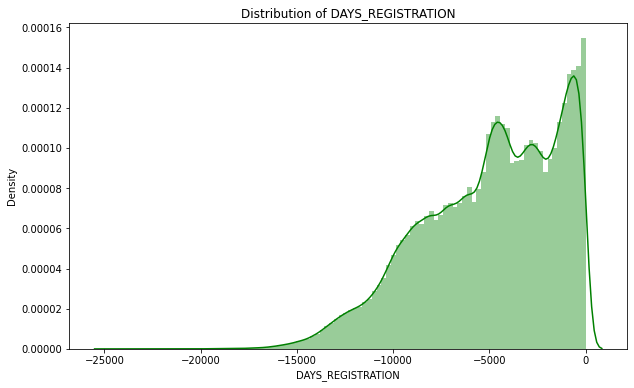

In [ ]:
plot_distribution('DAYS_REGISTRATION','green')

### Days ID publish distribution

In [ ]:
plot_distribution('DAYS_ID_PUBLISH','blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Comparaison de Target = 1 et Target = 0 sur plusieurs features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

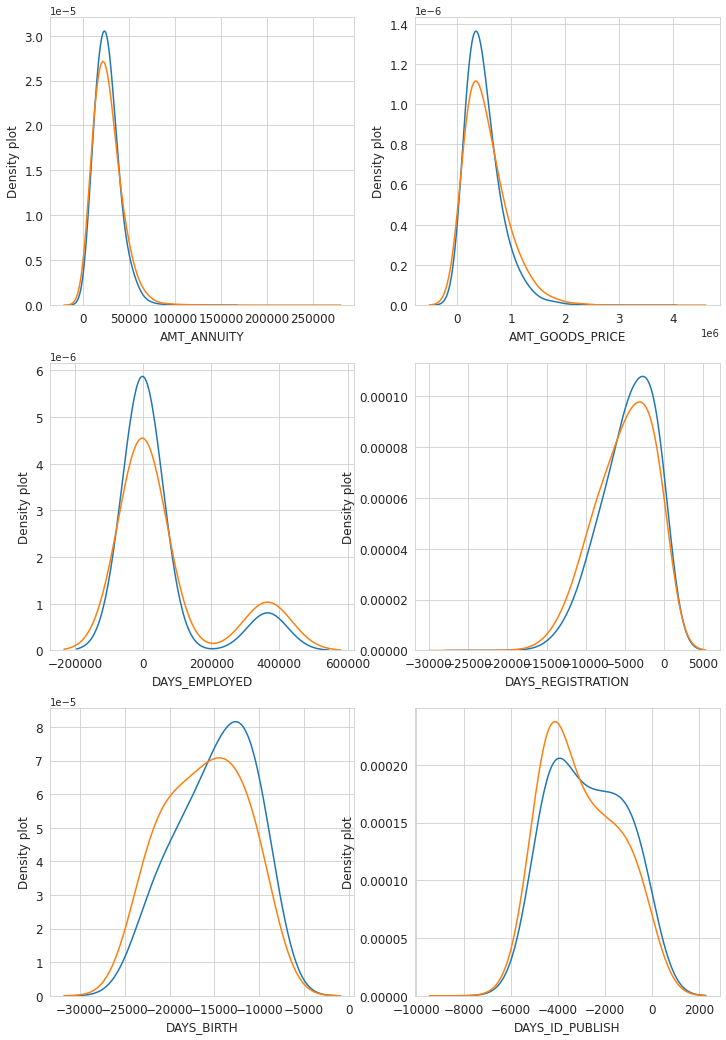

In [ ]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

### Region registered 

Regardons les valeurs pour les régions enregistrées(en tant qu'adresse) pour les clients.

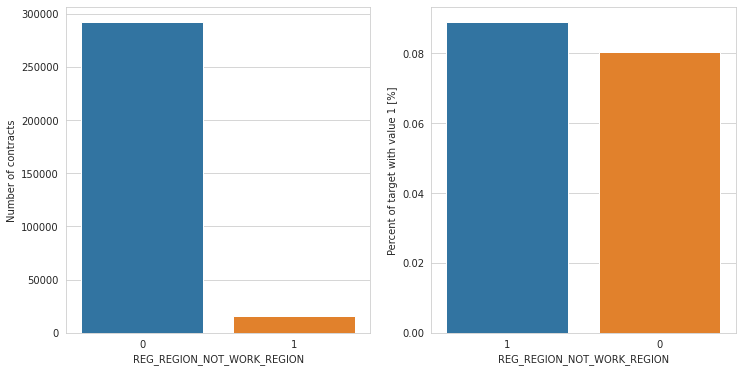

In [ ]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

### Ville enregistrée qui n'est pas la ville de travail du client


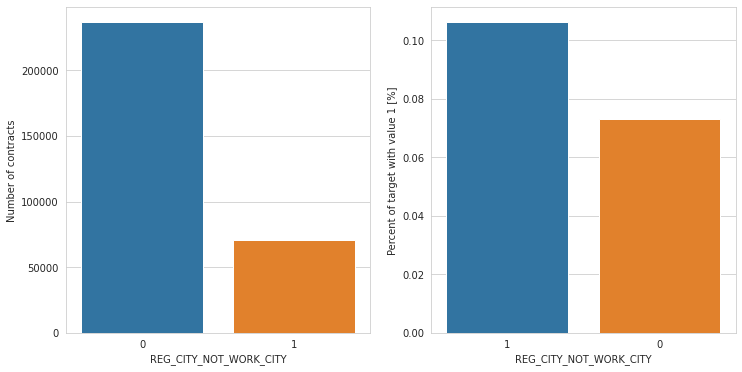

In [ ]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Généralement, beaucoup plus de personnes s'inscrivent dans la ville où elles habitent ou travaillent.

Ceux qui s'inscrivent dans une ville différente de la ville de travail ou de résidence ne remboursent pas plus fréquemment les prêts que ceux qui s'inscrivent dans la même ville.


<a name="Bur"></a>
# **Bureau Data**


Bureau data contient tout les crédis des clients chez une autre société de crédit.

**SK_ID_CURR** est la clé connectant *application_train*|*test* avec *bureau*.

On joint *application_train* avec *bureau*.

In [ ]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


Analysons maintenant *application_bureau_train*.

In [ ]:
def plot_b_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

### Statut du crédit

Voyons la distribution du statut des crédits

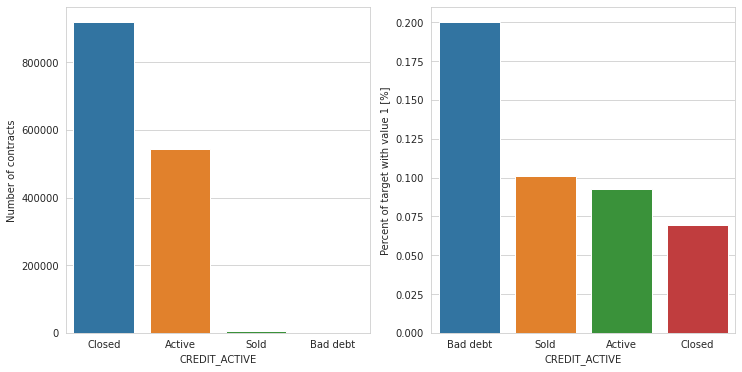

In [ ]:
plot_b_stats('CREDIT_ACTIVE')

La plupart des crédits enregistrés au Credit Bureau ont le statut *Closed* (~900K). Ensuite on a les crédits * Actifs * (un peu moins de 600K).

Ensuite on voit que dans les crédits non remboursés on retrouve des clients récidivistes qui se sont endéttés.

Cela signifie que l'ancien historique des crédits enregistré  est un indicateur fiable du crédit par défaut.

### Credit currency

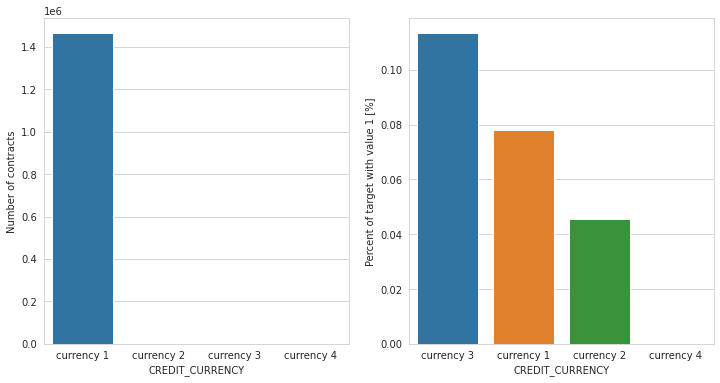

In [ ]:
plot_b_stats('CREDIT_CURRENCY')

### Types de credits au Credit Bureau

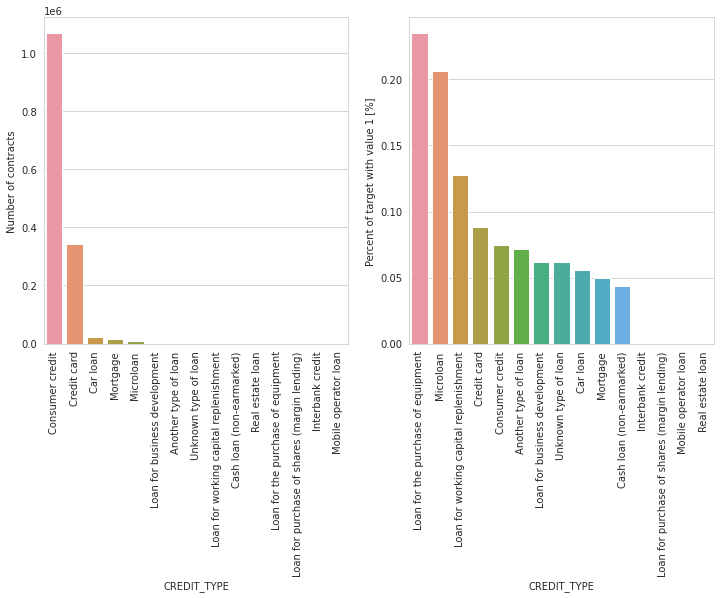

In [ ]:
plot_b_stats('CREDIT_TYPE', True, True)

La Majorité des emprunts au Credit Bureau sont *Consumer credit* et *Credit card*. Un nombre plus petit de credits sont *Car loan*, *Mortgage* et *Microloan*. En gros la majorité des crédits sont des crédits clients et obtenus sur la carte bancaire, le reste sont des micro prets, des emprunts pour,des voitures et des maisons.

### Durée des credits (DAYS_CREDIT)

Regardons la distribution de la durée des credits.


In [ ]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
plot_b_distribution('DAYS_CREDIT','green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Les crédits durent jusqu'à 3000 jours et sont les plus nombreux à un pic de 300 jours.

### Credit en découvert (CREDIT_DAY_OVERDUE)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


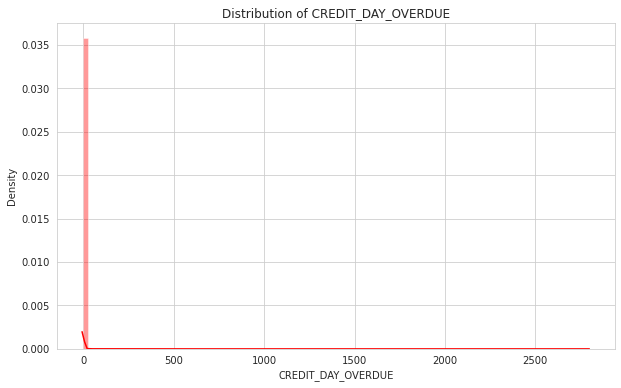

In [ ]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

### Credit sum  (AMT_CREDIT_SUM)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


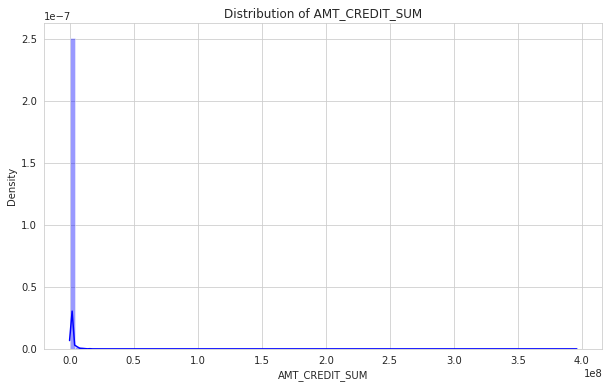

In [ ]:
plot_b_distribution('AMT_CREDIT_SUM','blue')

In [ ]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_b_o_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = application_bureau_train[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 

plot_b_o_distribution('AMT_CREDIT_SUM','blue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Credit : limite de la somme (AMT_CREDIT_SUM_LIMIT)

In [ ]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_bureau_train.loc[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train.loc[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

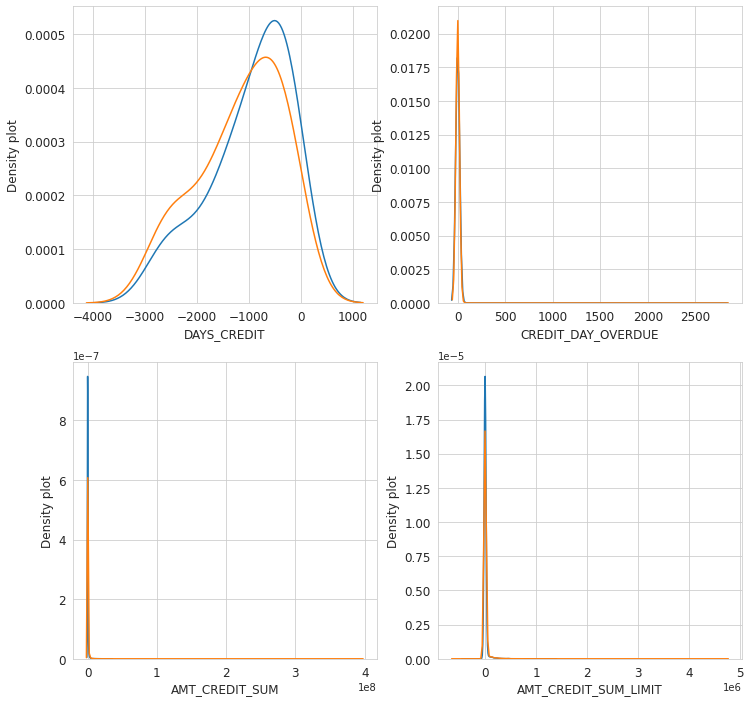

In [ ]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

<a name="Pre"></a>
# **Previous application Data**



Ce dataframe contient les demandes de crédits des clients dans la meme société de crédit contrairement à Bureau Credit. **SK_ID_CURR** connecte *application_train*|*test* avec *previous_application*.

On joint *application_train* avec *previous_application*.

In [ ]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ", 
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


In [ ]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_prev_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

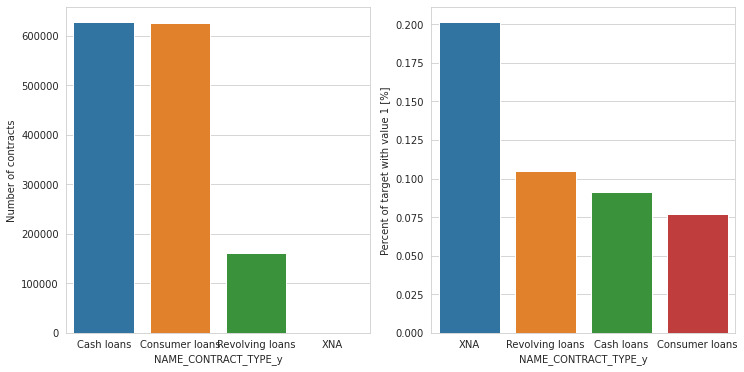

In [ ]:
plot_p_stats('NAME_CONTRACT_TYPE_y')

### But du crédit

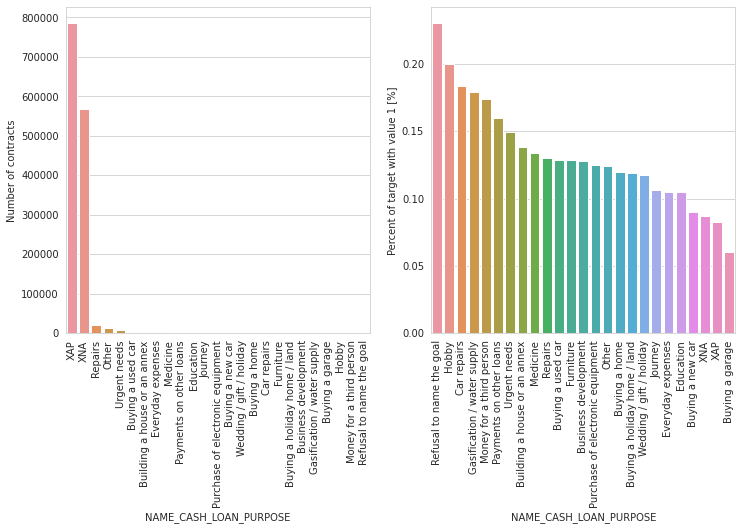

In [ ]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

### Statut du contrat 

In [ ]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

### Type de paiement

In [ ]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

### Types de clients

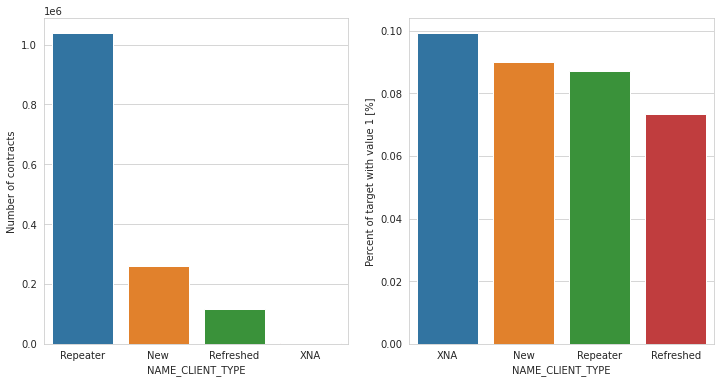

In [ ]:
plot_p_stats('NAME_CLIENT_TYPE')

<a name="Cor"></a>
# **Corrélations**


In [ ]:
# Find correlations with the target and sort
def target_correlation (df):
    correlations = df.corr()['TARGET'].sort_values(ascending=False)
    return correlations

In [ ]:
def heatmap_correlation(df) :
    corr = df.corr()
    plt.figure(figsize=(30,30))
    sns.heatmap(corr , annot=True, linewidths=.2, cmap="YlGnBu");

###  application_train

In [ ]:
building_normal_info_list = ['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE',
'HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE' ]


In [ ]:
df = application_train[building_normal_info_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET                          1.000000
NONLIVINGAPARTMENTS_MODE       -0.001557
NONLIVINGAPARTMENTS_MEDI       -0.002757
NONLIVINGAPARTMENTS_AVG        -0.003176
YEARS_BEGINEXPLUATATION_MODE   -0.009036
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BEGINEXPLUATATION_MEDI   -0.009993
LANDAREA_MODE                  -0.010174
LANDAREA_AVG                   -0.010885
LANDAREA_MEDI                  -0.011256
Name: TARGET, dtype: float64

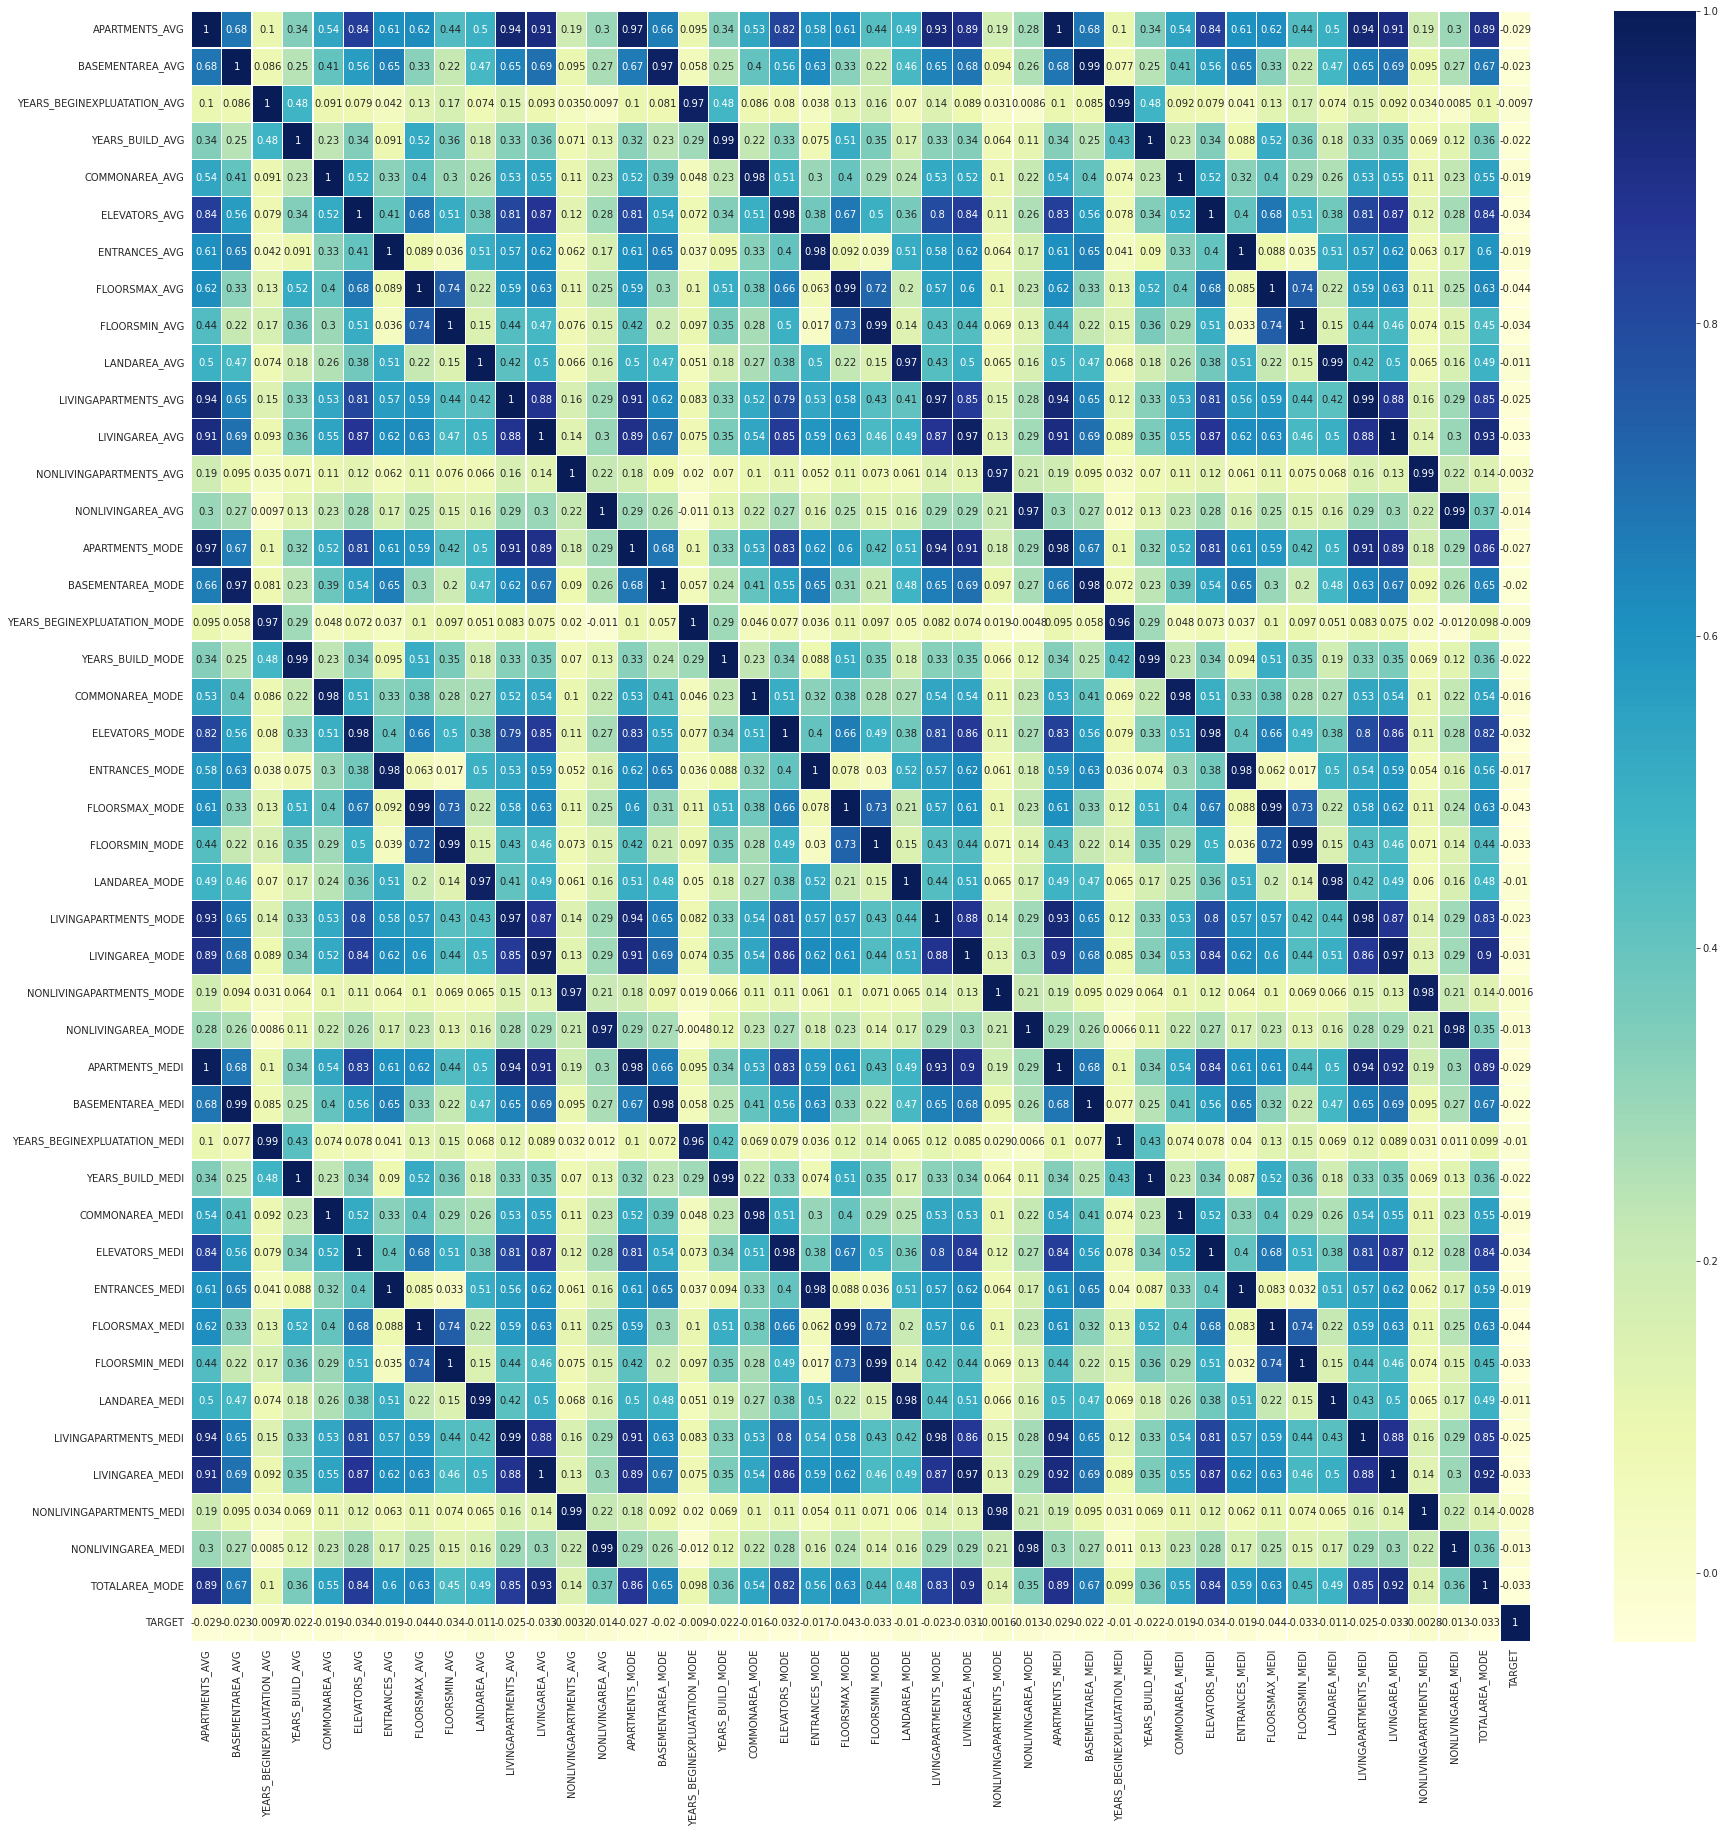

In [ ]:
heatmap_correlation(df)

In [ ]:
die_client_doc = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


In [ ]:
df = application_train[die_client_doc]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET              1.000000
FLAG_DOCUMENT_3     0.044346
FLAG_DOCUMENT_2     0.005417
FLAG_DOCUMENT_21    0.003709
FLAG_DOCUMENT_20    0.000215
FLAG_DOCUMENT_5    -0.000316
FLAG_DOCUMENT_12   -0.000756
FLAG_DOCUMENT_19   -0.001358
FLAG_DOCUMENT_10   -0.001414
FLAG_DOCUMENT_7    -0.001520
Name: TARGET, dtype: float64

In [ ]:
heatmap_correlation(df)

In [ ]:
AMT_REQ_CREDIT_BUREAU_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


In [ ]:
df = application_train[AMT_REQ_CREDIT_BUREAU_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET                        1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
Name: TARGET, dtype: float64

In [ ]:
heatmap_correlation(df)

In [ ]:
social_surroundings_list = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                            'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']


In [ ]:
df = application_train[social_surroundings_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET                      1.000000
DAYS_LAST_PHONE_CHANGE      0.055218
DEF_30_CNT_SOCIAL_CIRCLE    0.032248
DEF_60_CNT_SOCIAL_CIRCLE    0.031276
OBS_30_CNT_SOCIAL_CIRCLE    0.009131
OBS_60_CNT_SOCIAL_CIRCLE    0.009022
Name: TARGET, dtype: float64

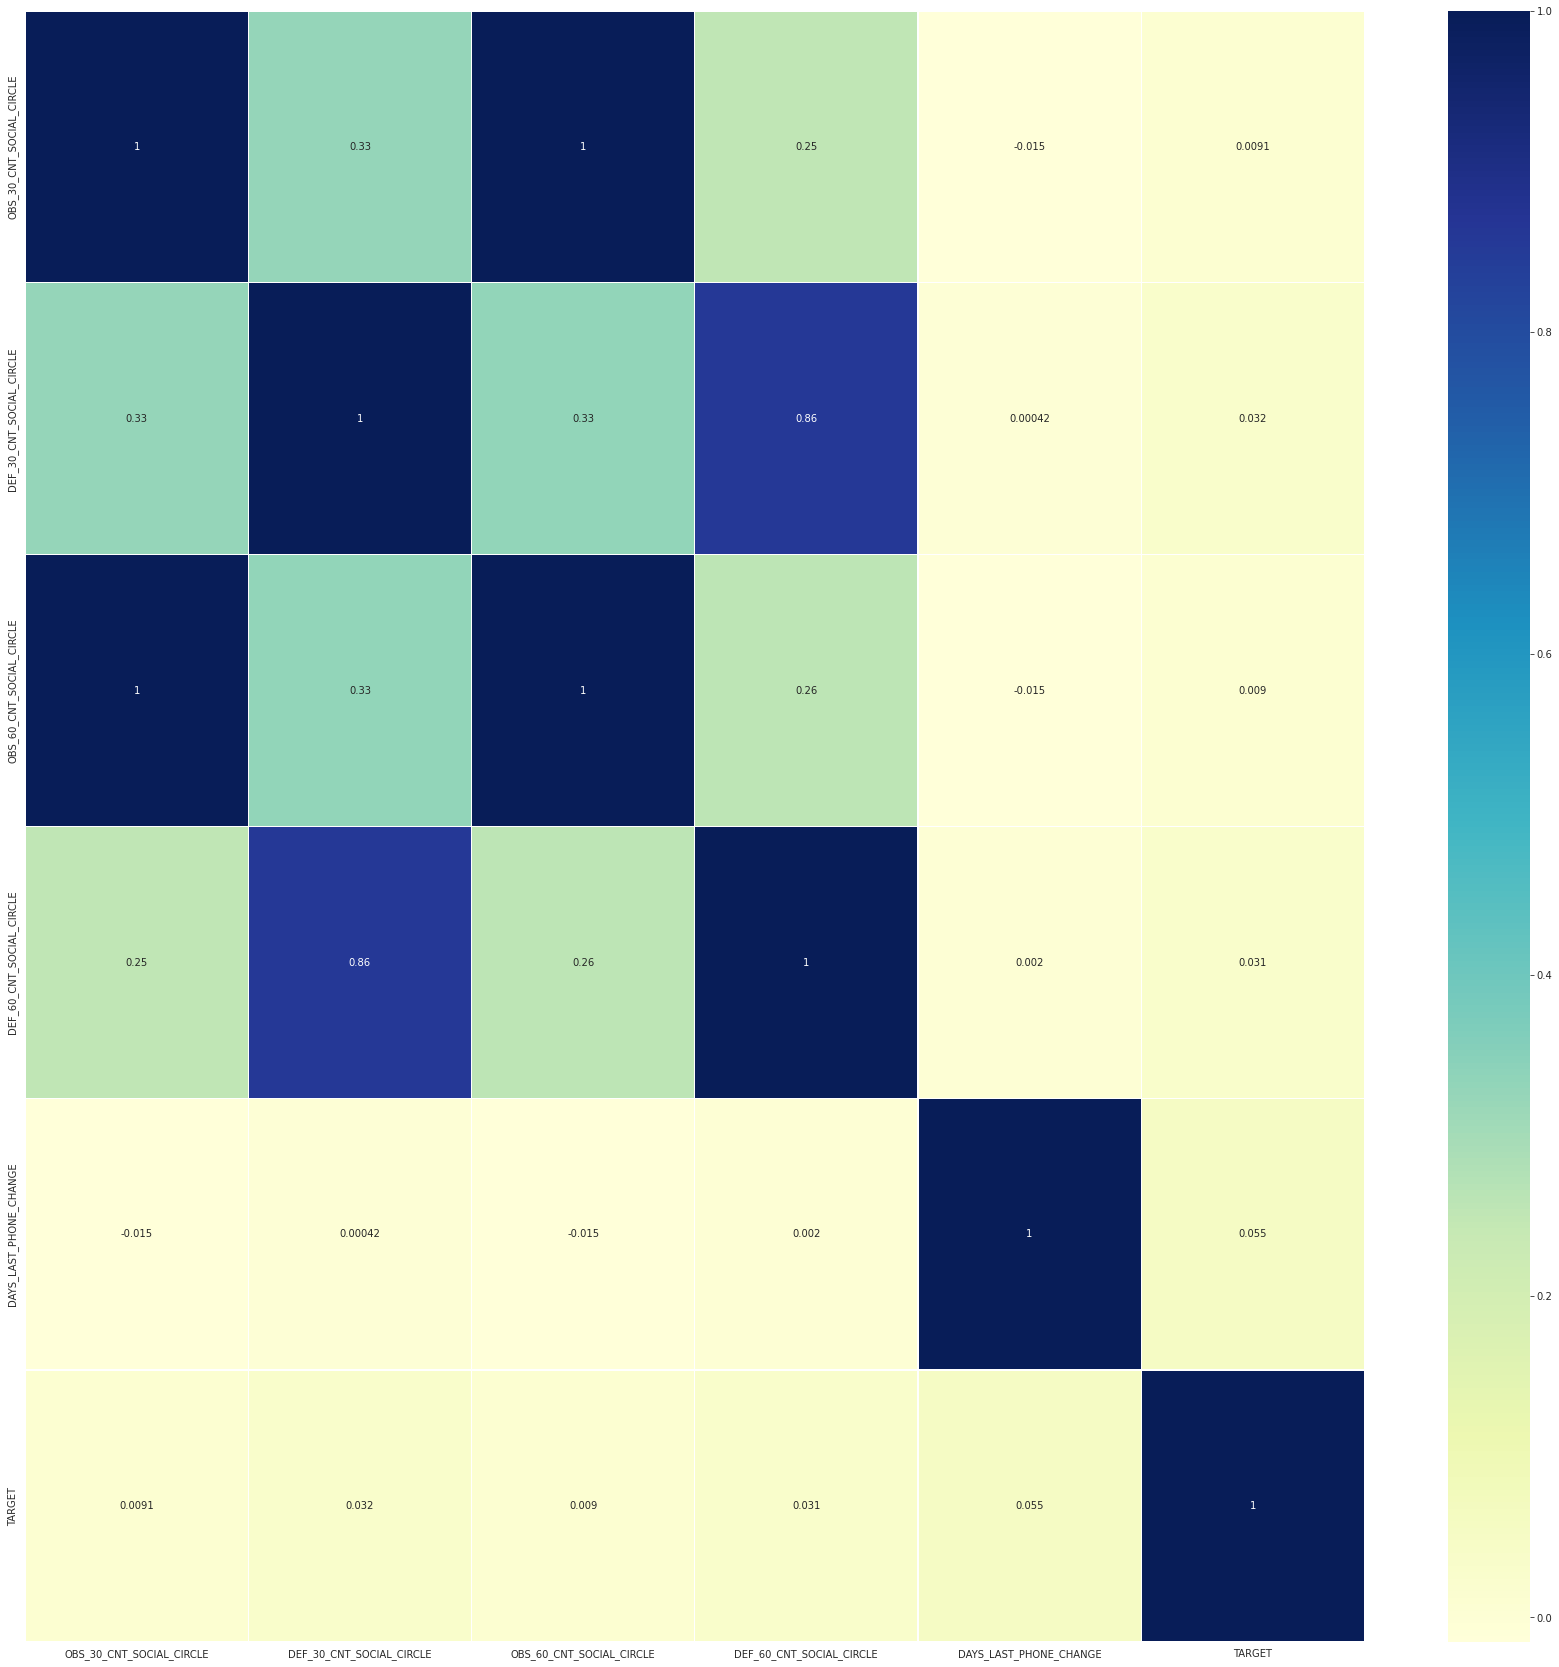

In [ ]:
heatmap_correlation(df)

In [ ]:
external_score_list = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

In [ ]:
df = application_train[external_score_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET          1.000000
EXT_SOURCE_1   -0.155317
EXT_SOURCE_2   -0.160472
EXT_SOURCE_3   -0.178919
Name: TARGET, dtype: float64

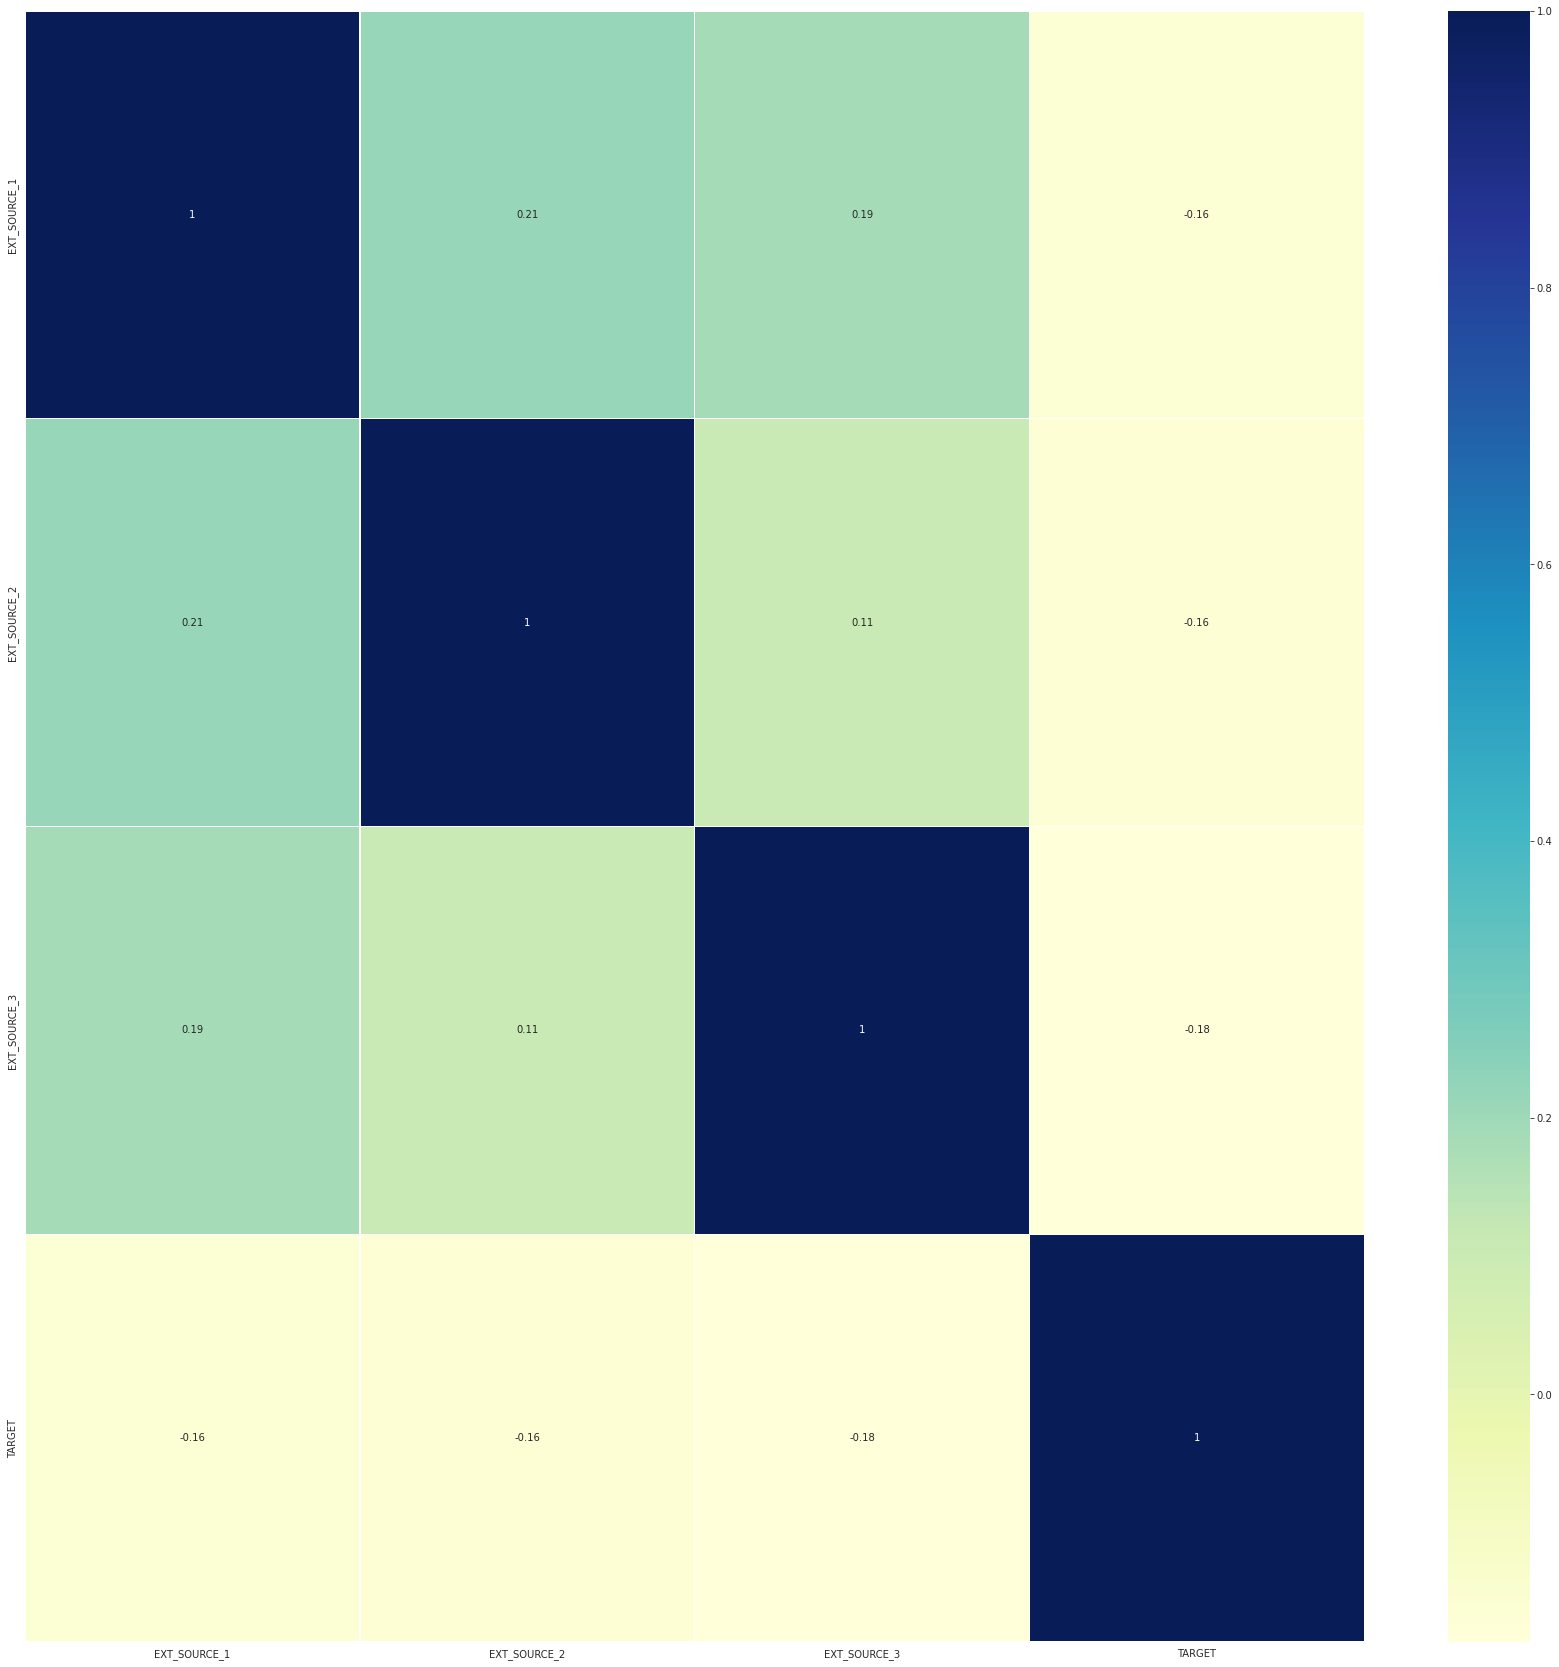

In [ ]:
heatmap_correlation(df)

In [ ]:
Flag_list = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [ ]:
df = application_train[Flag_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)


TARGET                         1.000000
REG_CITY_NOT_WORK_CITY         0.050994
REG_CITY_NOT_LIVE_CITY         0.044395
LIVE_CITY_NOT_WORK_CITY        0.032518
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
LIVE_REGION_NOT_WORK_REGION    0.002819
Name: TARGET, dtype: float64

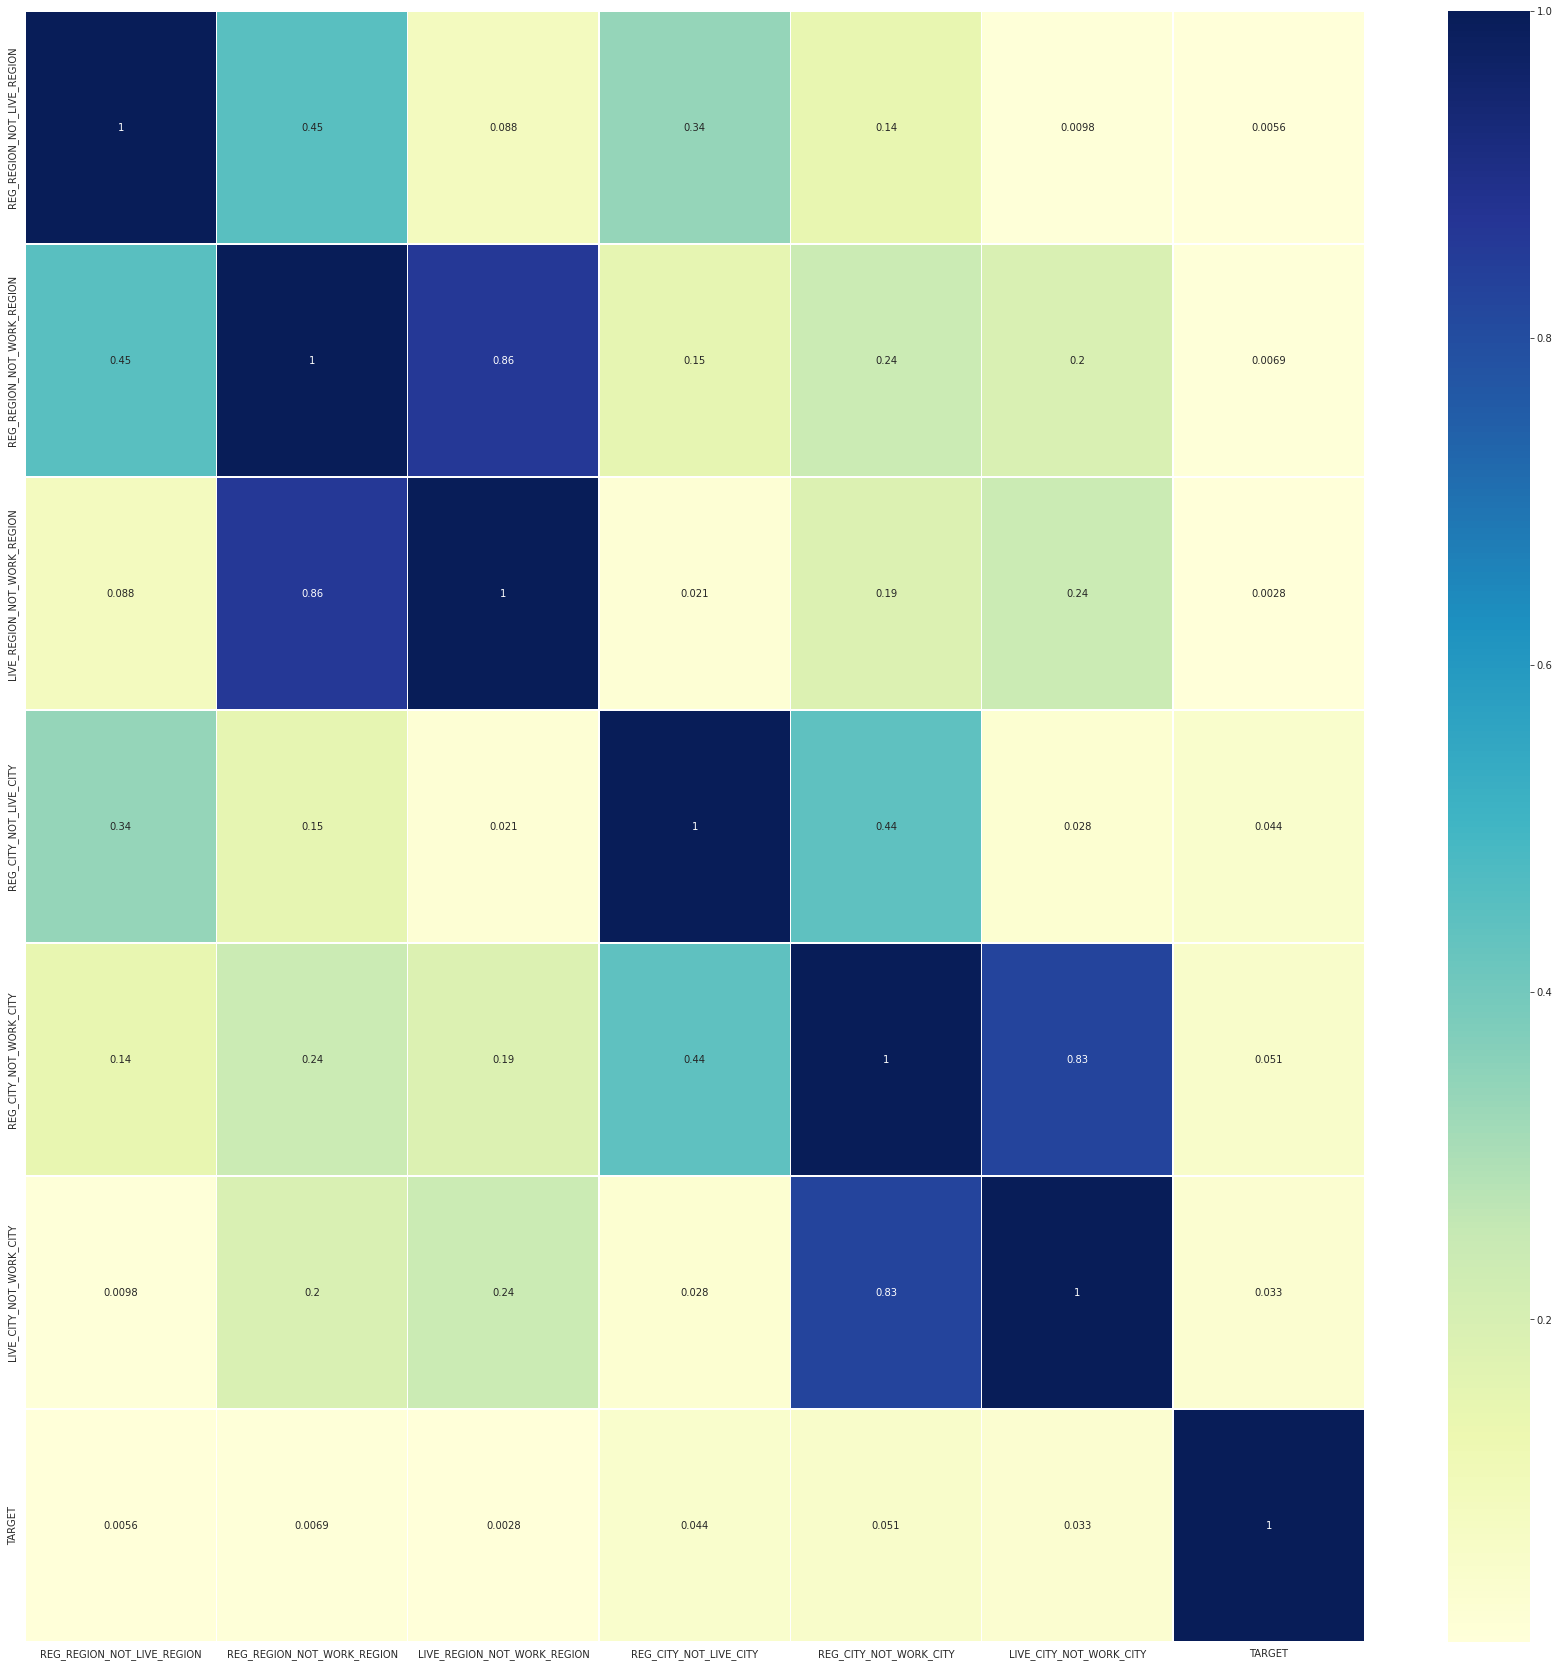

In [ ]:
heatmap_correlation(df)

In [ ]:
AMT_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

In [ ]:
df = application_train[AMT_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET              1.000000
AMT_INCOME_TOTAL   -0.003982
AMT_ANNUITY        -0.012817
AMT_CREDIT         -0.030369
AMT_GOODS_PRICE    -0.039645
Name: TARGET, dtype: float64

In [ ]:
heatmap_correlation(df)

In [ ]:
days_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' ]

In [ ]:
df = application_train[days_list]
df['TARGET']= application_train['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
target_correlation (df).head(10)

TARGET               1.000000
DAYS_BIRTH           0.078239
DAYS_ID_PUBLISH      0.051457
DAYS_REGISTRATION    0.041975
DAYS_EMPLOYED       -0.044932
Name: TARGET, dtype: float64

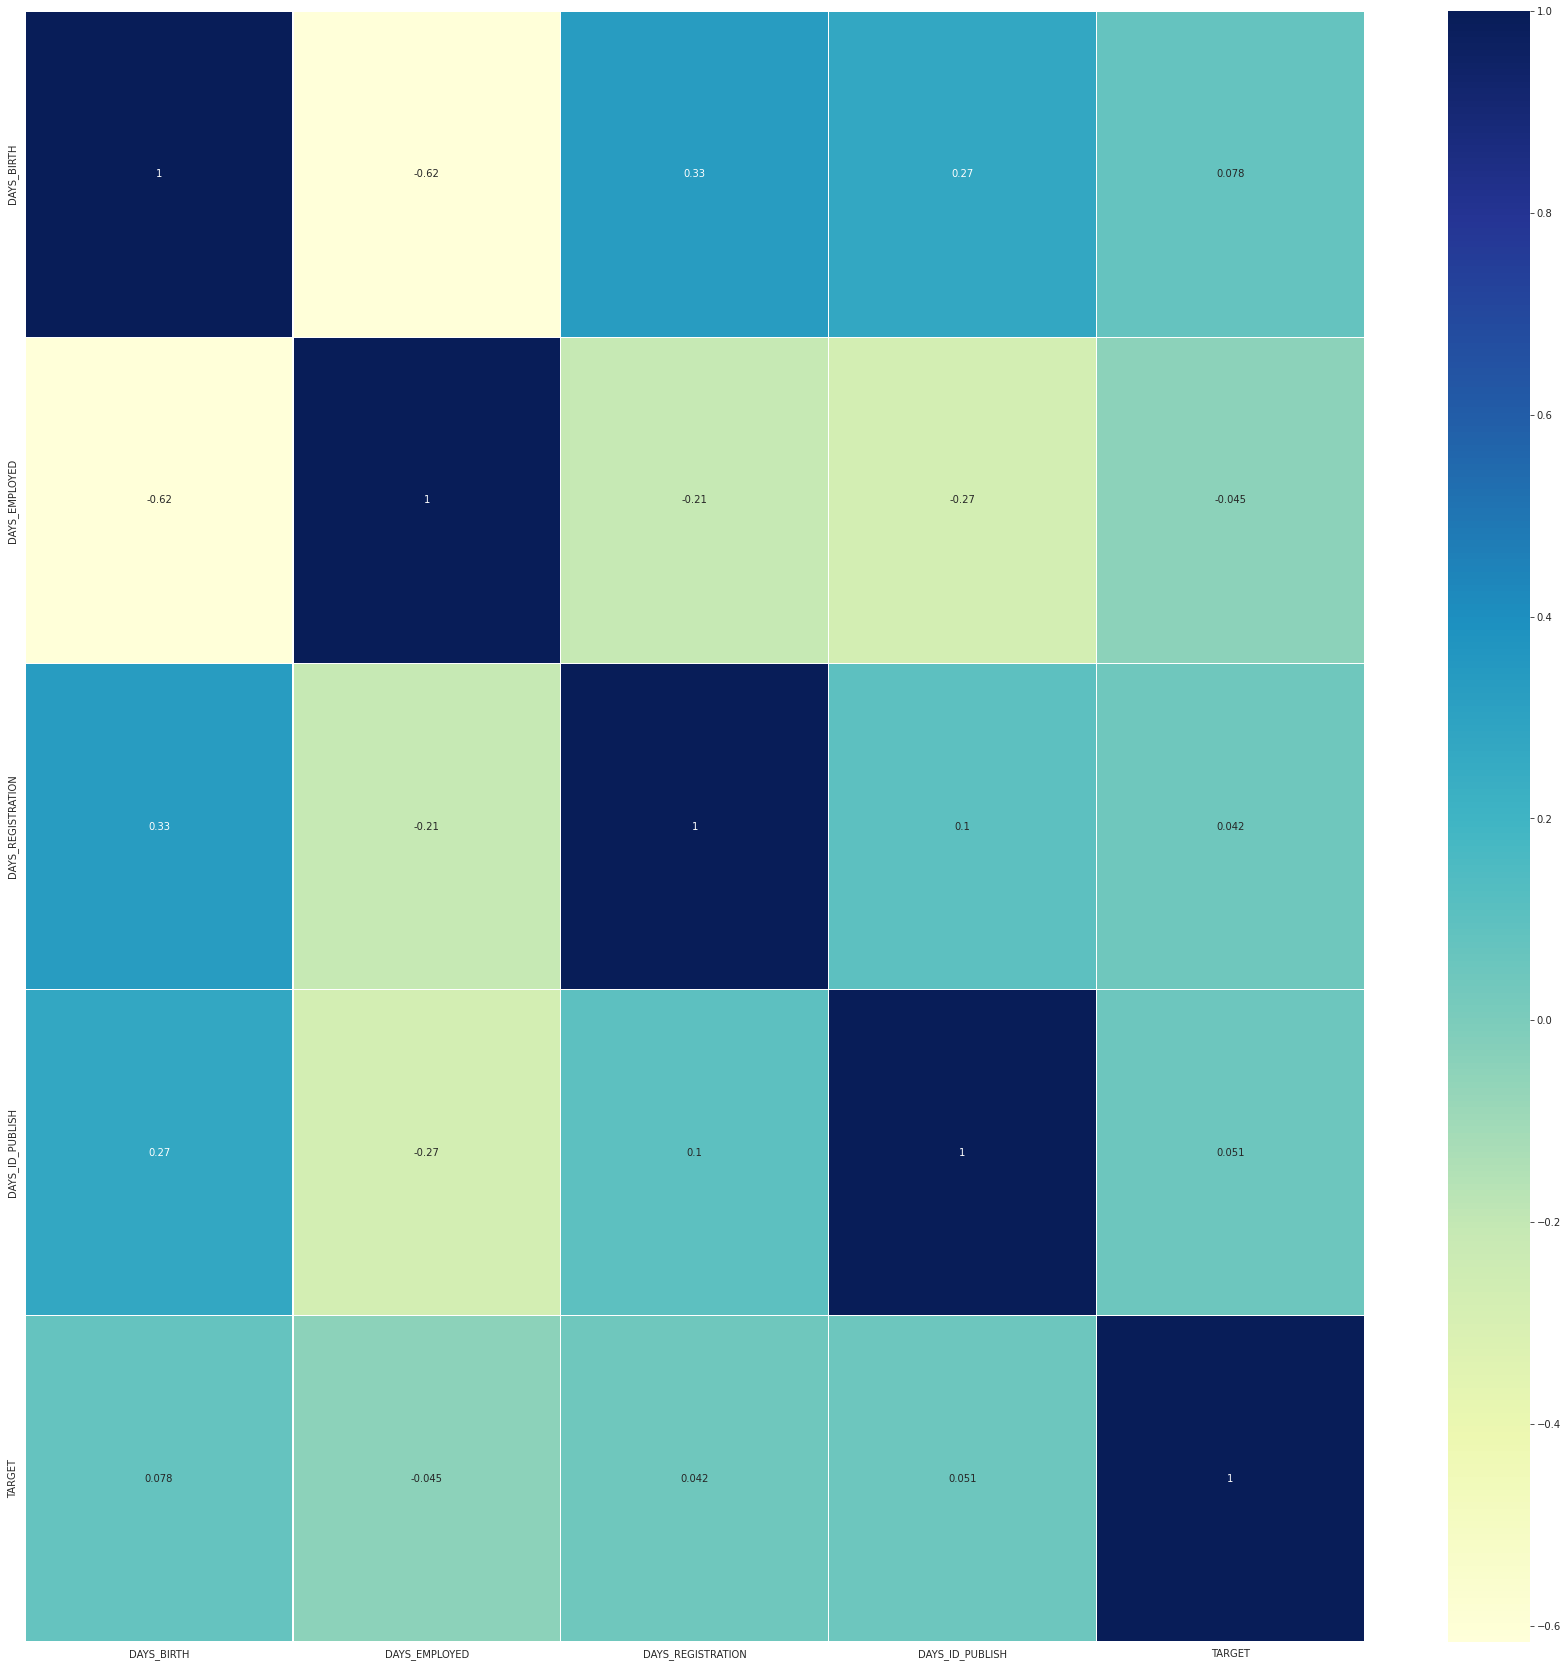

In [ ]:
heatmap_correlation(df)

## bureau

In [ ]:
bureau_list = ['CREDIT_ACTIVE','CREDIT_CURRENCY','DAYS_CREDIT','CREDIT_DAY_OVERDUE',
'DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT',
'AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE','CREDIT_TYPE','DAYS_CREDIT_UPDATE','AMT_ANNUITY','SK_ID_CURR']

In [ ]:
df = bureau[bureau_list]
df = df.merge(application_train[['TARGET','SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')

In [ ]:
target_correlation (df).head(10)

TARGET                    1.000000
DAYS_CREDIT               0.061556
DAYS_CREDIT_UPDATE        0.041076
DAYS_ENDDATE_FACT         0.039057
DAYS_CREDIT_ENDDATE       0.026497
AMT_CREDIT_SUM_OVERDUE    0.006253
CREDIT_DAY_OVERDUE        0.002652
AMT_CREDIT_SUM_DEBT       0.002539
AMT_CREDIT_MAX_OVERDUE    0.001587
CNT_CREDIT_PROLONG        0.001523
Name: TARGET, dtype: float64

In [ ]:
heatmap_correlation(df)

## credit_card_balance

In [ ]:
df = credit_card_balance
df = df.merge(application_train[['TARGET','SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')

In [ ]:
target_correlation (df).head(10)

TARGET                      1.000000
AMT_BALANCE                 0.050098
AMT_TOTAL_RECEIVABLE        0.049839
AMT_RECIVABLE               0.049803
AMT_RECEIVABLE_PRINCIPAL    0.049692
AMT_INST_MIN_REGULARITY     0.039798
CNT_DRAWINGS_ATM_CURRENT    0.038437
CNT_DRAWINGS_CURRENT        0.037793
MONTHS_BALANCE              0.035695
CNT_DRAWINGS_POS_CURRENT    0.029536
Name: TARGET, dtype: float64

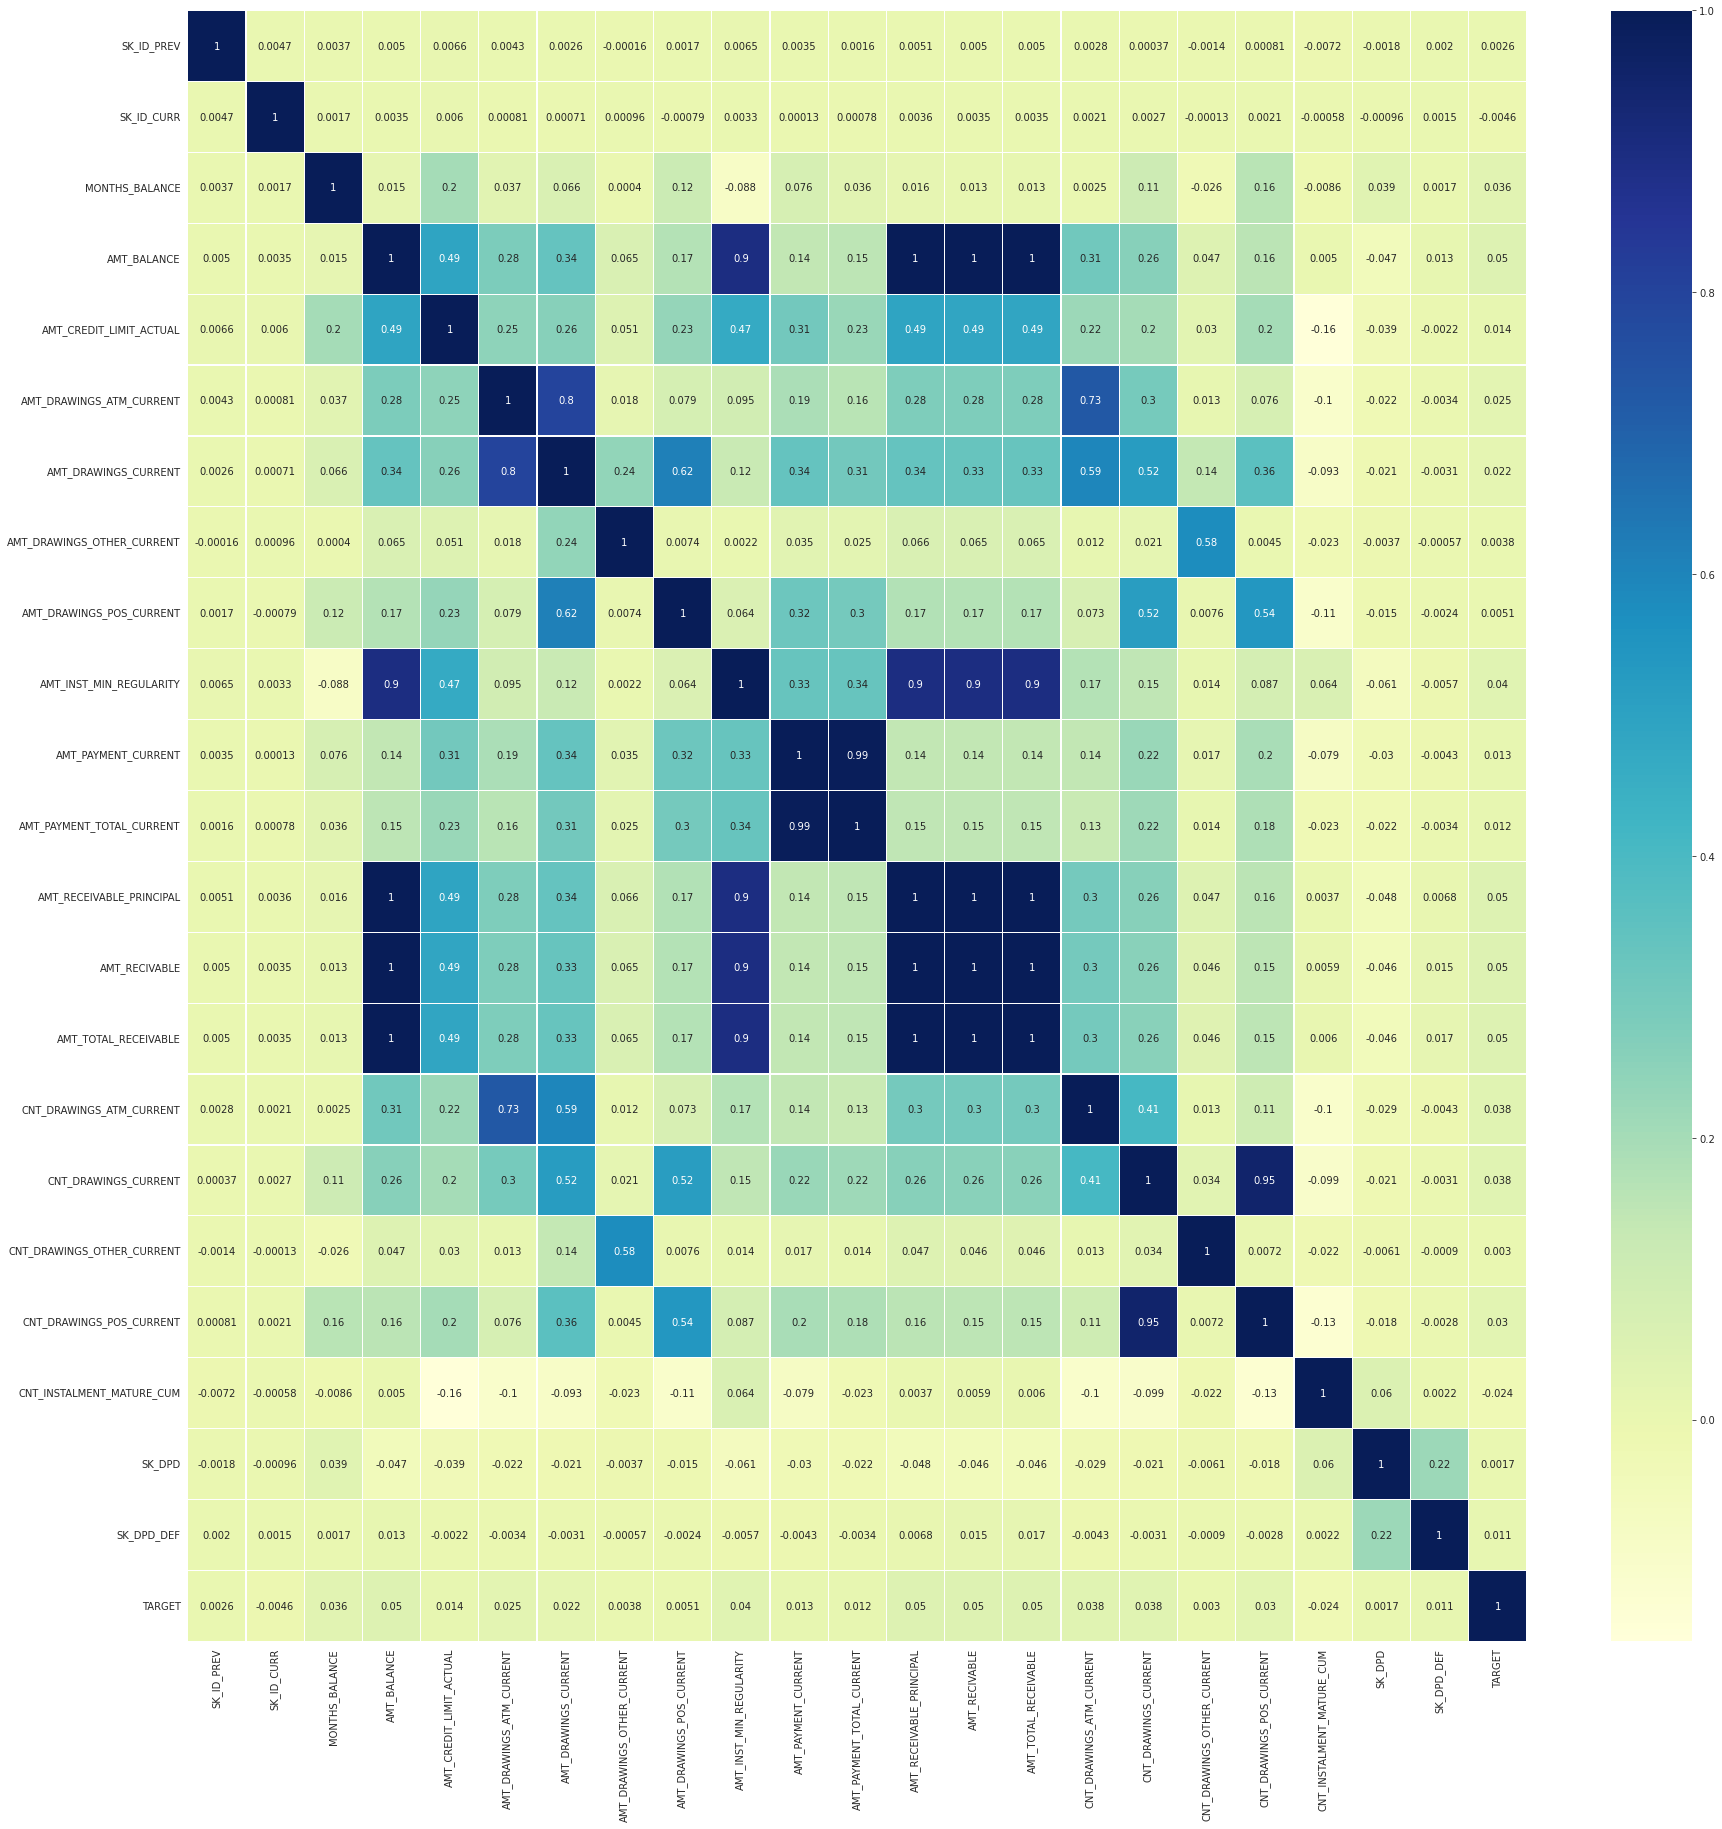

In [ ]:
heatmap_correlation(df)

## installments_payments

In [ ]:
df = installments_payments
df = df.merge(application_train[['TARGET','SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')

In [ ]:
target_correlation (df).head(10)

TARGET                    1.000000
DAYS_ENTRY_PAYMENT        0.035122
DAYS_INSTALMENT           0.034974
SK_ID_PREV               -0.000212
AMT_INSTALMENT           -0.001498
SK_ID_CURR               -0.002540
AMT_PAYMENT              -0.003623
NUM_INSTALMENT_VERSION   -0.009896
NUM_INSTALMENT_NUMBER    -0.016190
Name: TARGET, dtype: float64

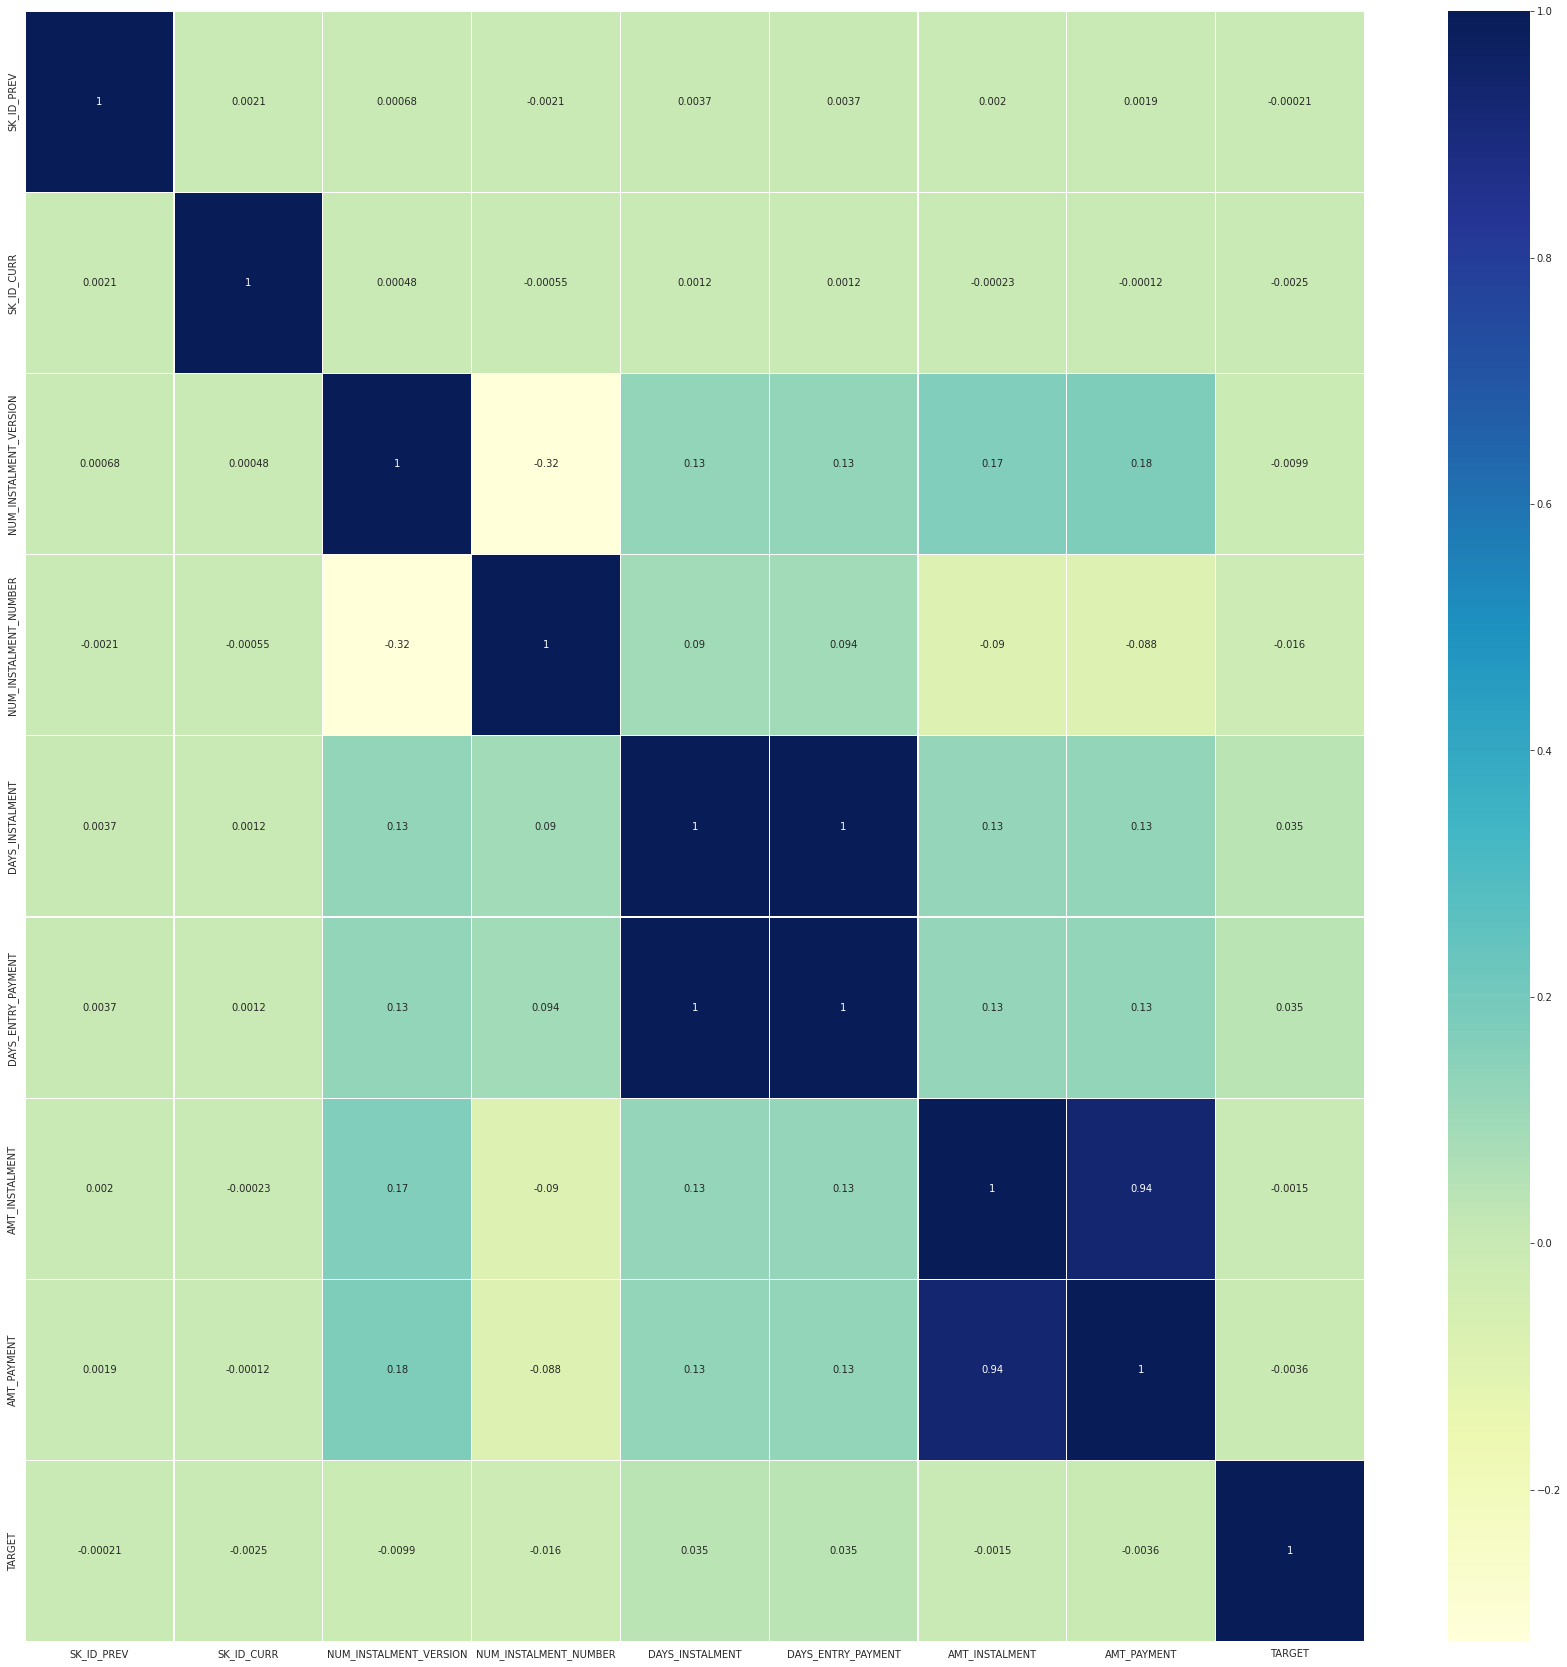

In [ ]:
heatmap_correlation(df)

## previous_applications

In [ ]:
df = previous_application
df = df.merge(application_train[['TARGET','SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')

In [ ]:
target_correlation (df).head(10)

TARGET                       1.000000
DAYS_DECISION                0.039901
CNT_PAYMENT                  0.030480
RATE_INTEREST_PRIVILEGED     0.028640
DAYS_LAST_DUE_1ST_VERSION    0.018021
DAYS_LAST_DUE                0.017522
DAYS_TERMINATION             0.016981
SK_ID_PREV                   0.002009
NFLAG_INSURED_ON_APPROVAL    0.000653
AMT_GOODS_PRICE              0.000254
Name: TARGET, dtype: float64

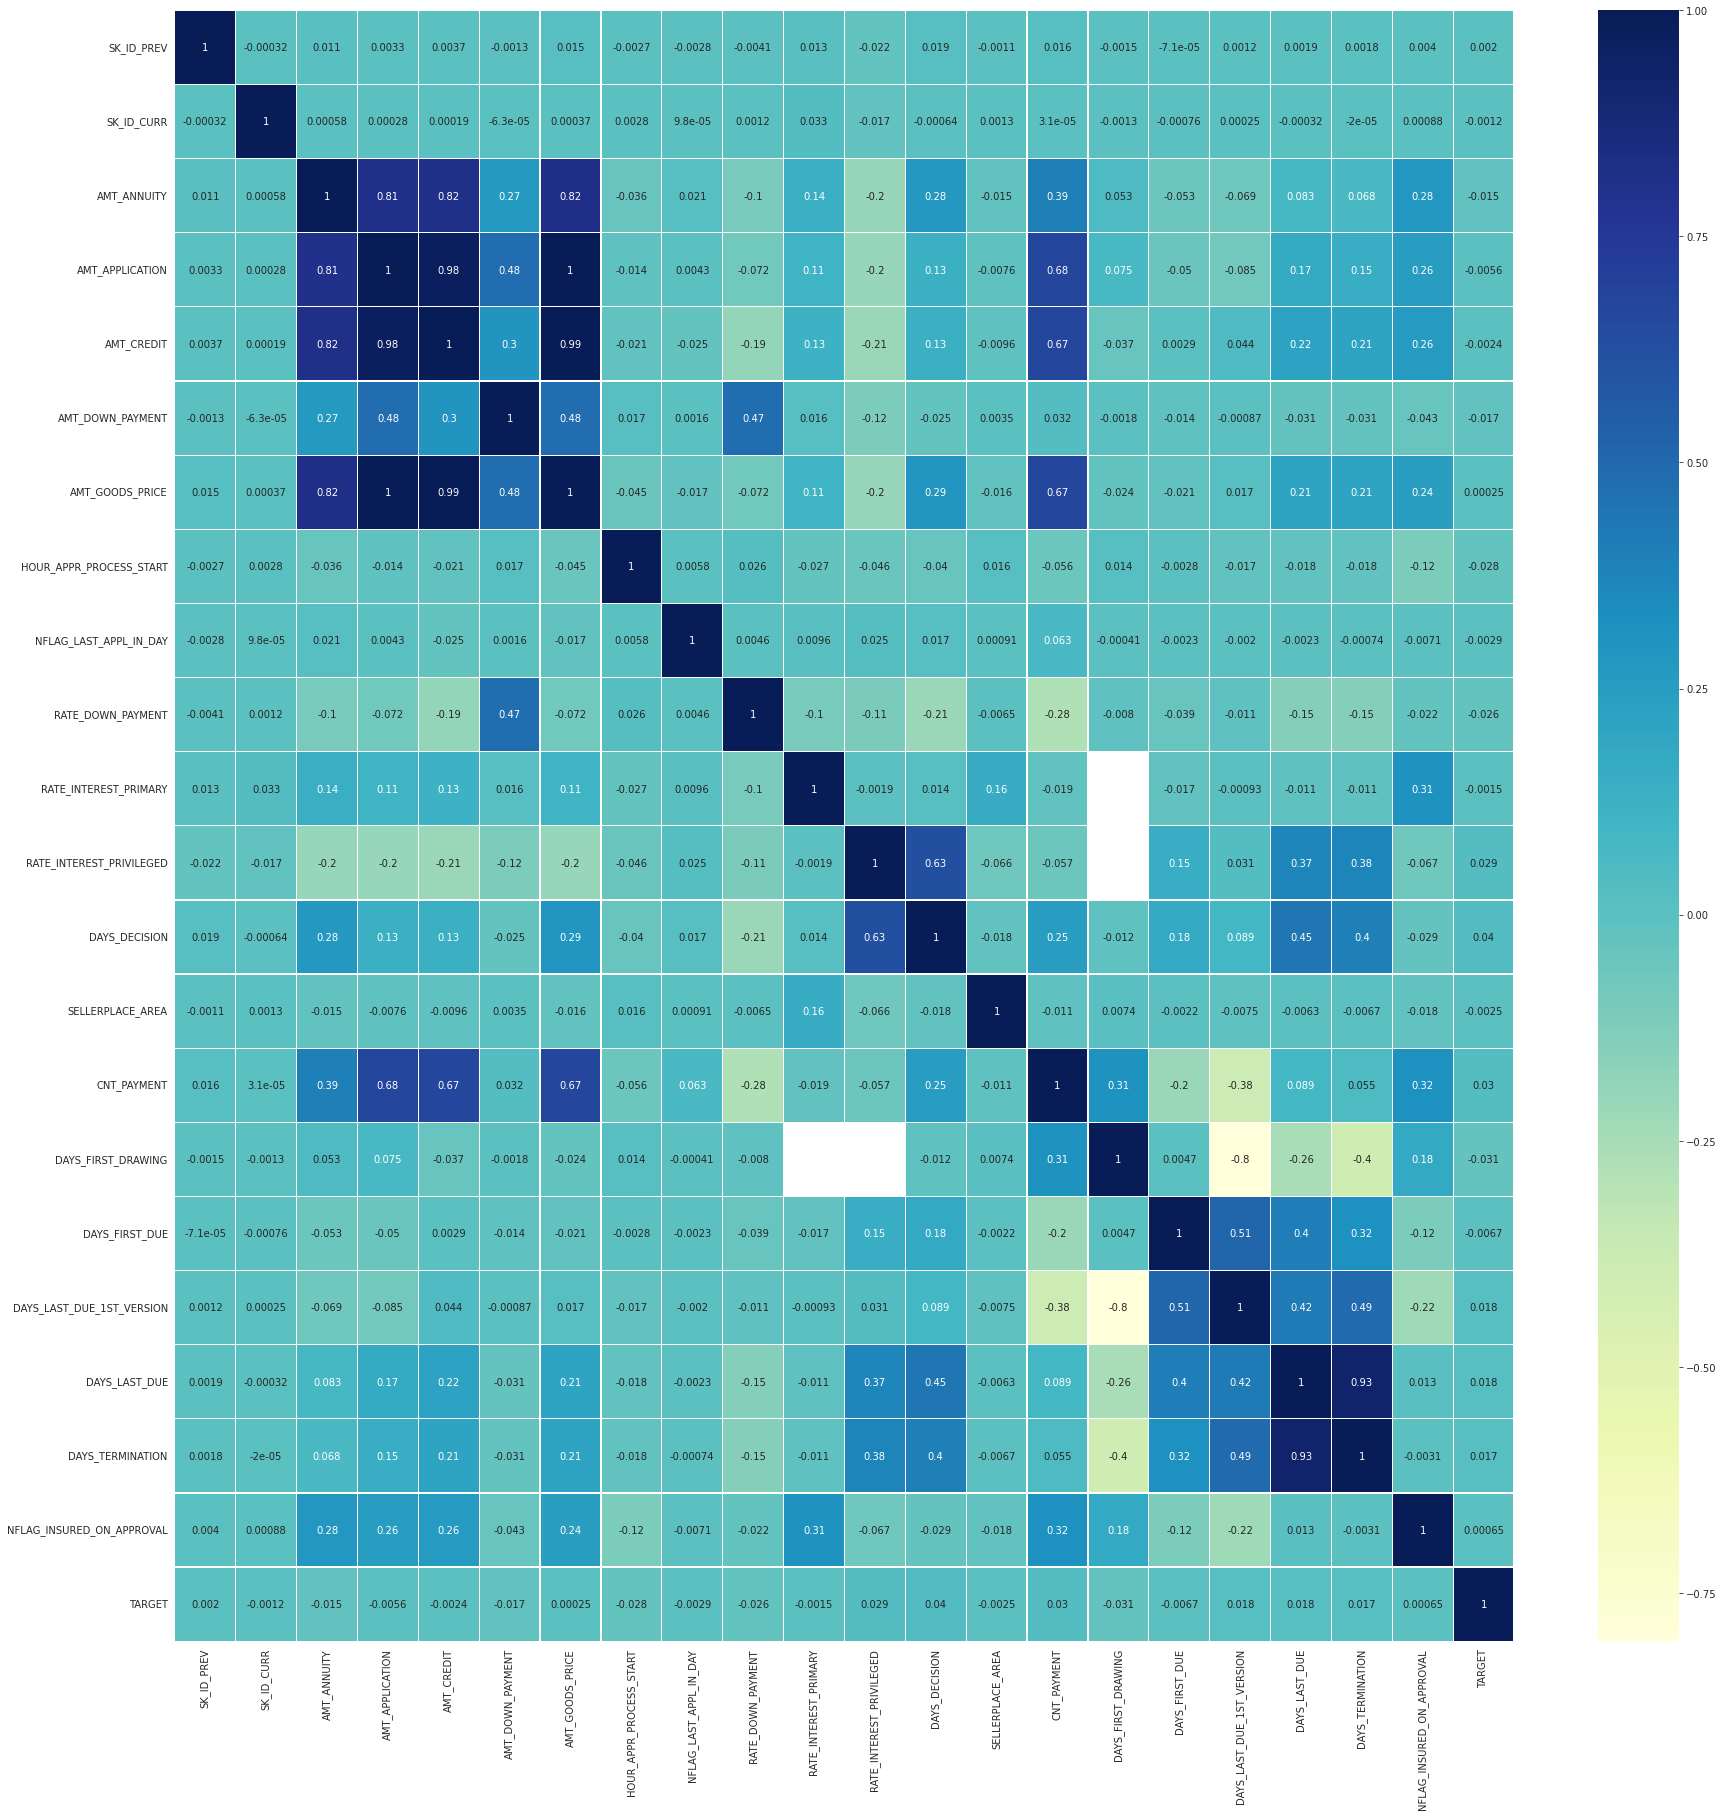

In [ ]:
heatmap_correlation(df)

## POS_CASH_balance

In [ ]:
df = POS_CASH_balance
df = df.merge(application_train[['TARGET','SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')

In [ ]:
target_correlation (df).head(10)

TARGET                   1.000000
CNT_INSTALMENT_FUTURE    0.021972
MONTHS_BALANCE           0.020147
CNT_INSTALMENT           0.018506
SK_DPD                   0.009866
SK_DPD_DEF               0.008594
SK_ID_PREV              -0.000056
SK_ID_CURR              -0.002245
Name: TARGET, dtype: float64

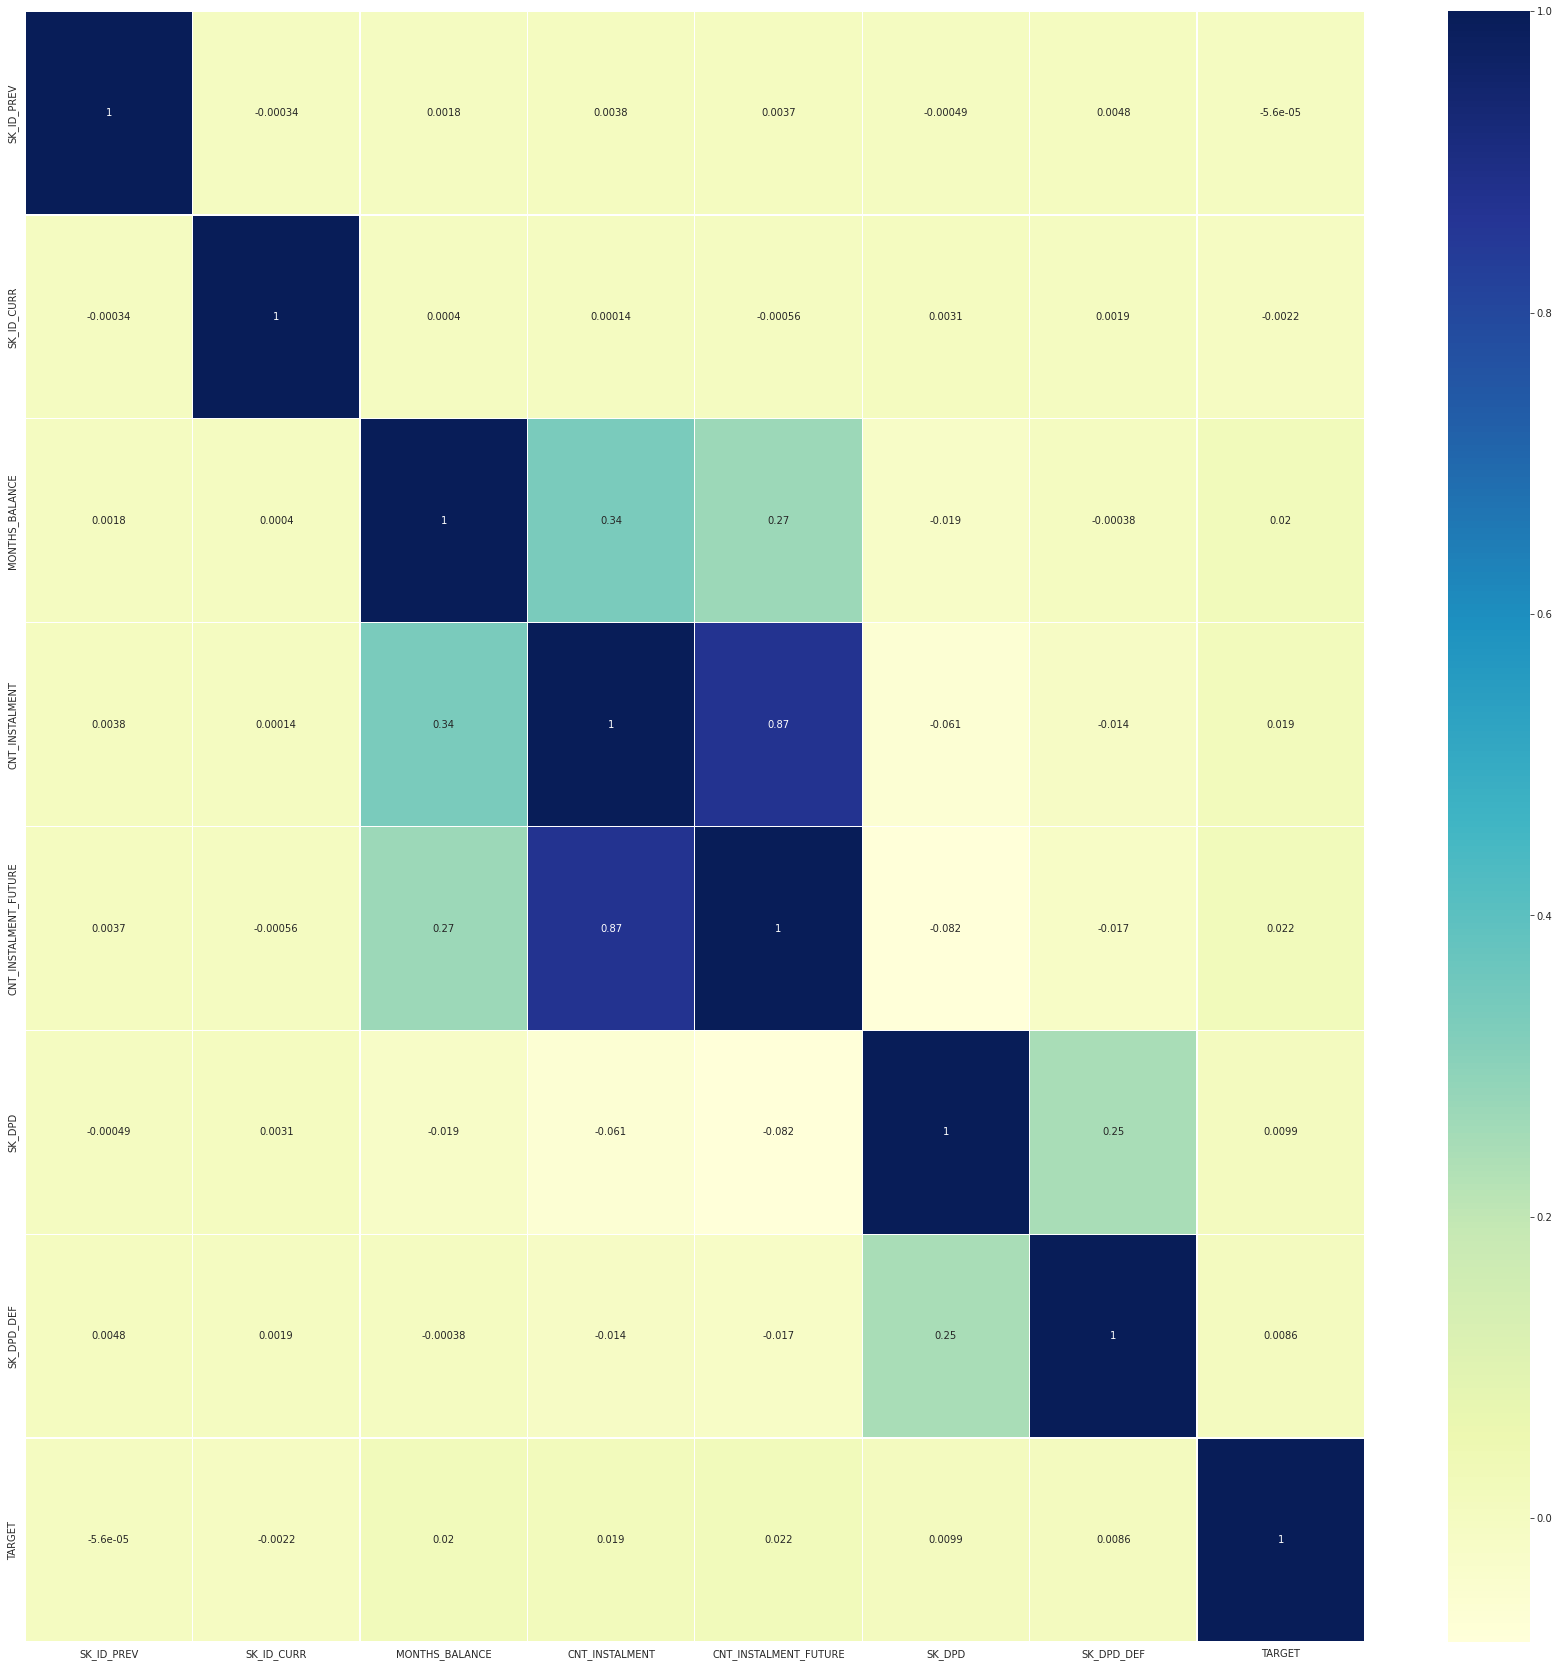

In [ ]:
heatmap_correlation(df)

## Conclusion

* Ce notebook d'Analyse exploratoire des données :
- permet de comprendre l'ensemble de données donné et aide à nettoyer l'ensemble de données.
- donne une image claire des caractéristiques et des relations entre les variables.
- gérer les valeurs manquantes .
- Identifier les valeurs aberrantes.

En se basant sur ce fichier EDA, on va selectionner les variables pertinentes pour la modélisation et construire la base finale des data dans le fichier 'feature_engineering'.